# План EDA

1. Описание данных, понимание физического смысл данных. Формулирование гипотез и возможных целей.
2. Определение типов и структур данных в столбцых (числа, строки, форматы записи)
3. Обработка значений (недопустимые значения, дубликаты, преобразование типов данных, преобразование форматов записи, если нужно)
4. Обработка пропущенных значений
4. Исследование признаков данных по отдельности 
5. Исследование совокупности признаков

# Описание данных

## Подключаем библиотеки

In [273]:
import numpy as np 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

import plotly
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [274]:
import warnings
from pandas import compat

warnings.filterwarnings("ignore", category=DeprecationWarning)

## Загружаем данные

Датасет взят с kaggle. 

В 2002–2004 годах Колумбийский университет провел эксперимент по быстрым свиданиям, в ходе которого они отслеживали данные 21 сеанса быстрых свиданий, в основном среди молодых людей, встречающихся с людьми противоположного пола.

Сам датасет является выжимкой пользвователя kaggle из реального исследования (ключ приложен в файле Speed Dating Data Key.doc). Для тренировочного датасета достаточно.


https://www.kaggle.com/datasets/mexwell/speed-dating

Загрузим данные и сразу сделаем backup, на всякий случай

In [275]:
link = '/home/mikhail/DS_with_sasha/Fast_dating/speed_dating.csv'
dating = pd.read_csv(link)
dating_backup = dating.copy()
dating.head()

,gender,age,income,goal,career,dec,attr,sinc,intel,fun,amb,shar,like,prob,met
0,0,21.000,69487.000,2.000,lawyer,1,6.000,9.000,7.000,7.000,6.000,5.000,7.000,6.000,2.000
1,0,21.000,69487.000,2.000,lawyer,1,7.000,8.000,7.000,8.000,5.000,6.000,7.000,5.000,1.000
2,0,21.000,69487.000,2.000,lawyer,1,5.000,8.000,9.000,8.000,5.000,7.000,7.000,NaN,1.000
3,0,21.000,69487.000,2.000,lawyer,1,7.000,6.000,8.000,7.000,6.000,8.000,7.000,6.000,2.000
4,0,21.000,69487.000,2.000,lawyer,1,5.000,6.000,7.000,7.000,6.000,6.000,6.000,6.000,2.000


## Описание признаков

Первые 5 колонок представляют собой личные данные участника свидания. А именно:

* gender - пол:
    + ж = 0
    + м = 1
* age - возраст
* income - Средний доход семьи на основе почтового индекса с использованием веб-сайта Бюро переписи населения. Когда доходов нет, это означает, что они либо из-за границы, либо не ввели свой почтовый индекс.
* goal - цель участия:
    + Повеселиться = 1
    + Знакомство с новыми людьми = 2
    + Сходить на свидание = 3
    + Серьезные отношения = 4
    + "Сказать, что я это сделал" = 5
    + Другое = 6  
* сareer - профессиональная деятельность

Кололнка dec определяет решение оценщика, 

* dec - решение,
    + 0 = не мэтч, окончание знакомства
    + 1 = мэтч, продолжение знакомства

В последних колонках представленны оценочные признаки. Это баллы от 1-10 выставленные друг друг участниками свидания

* sinc - искренность
* intel - ум
* fun - юмор
* amb - амбициозность
* shar - совпадение интересов
* like - общая оценка
* prob - считает ли оценщик, что баллы будут взаимными
* met - встречались ли раньше 1 - да, 2 -нет

Посмотрим общую свобдку по таблице через метод info()

In [276]:
dating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   gender  8378 non-null   int64  
 1   age     8283 non-null   float64
 2   income  4279 non-null   float64
 3   goal    8299 non-null   float64
 4   career  8289 non-null   object 
 5   dec     8378 non-null   int64  
 6   attr    8176 non-null   float64
 7   sinc    8101 non-null   float64
 8   intel   8082 non-null   float64
 9   fun     8028 non-null   float64
 10  amb     7666 non-null   float64
 11  shar    7311 non-null   float64
 12  like    8138 non-null   float64
 13  prob    8069 non-null   float64
 14  met     8003 non-null   float64
dtypes: float64(12), int64(2), object(1)
memory usage: 981.9+ KB


Всего 8378 записей

Один категориальный признак - профессия. 

Пропуски имееются во всех строках, кроме dec и gender. 

## Формулировка гипотез и целей

1. Определить наиболее важные для мэтча качества для мужчин и женщин.
2. Определить самые привлекательные профессии
3. Предсказать будет ли совпадение у людей, по их качествам
4. Девушки отказывают чаще?
5. Если уже встречали друг друга, то шанс на успех понижается?
6. Серьезность намерений растет с возрастом?
7. Добиваются ли люди своей цели, и с какой целью лучше идти на свидание?

# Обработка признаков

Посмотрим на дубликаты по всем данным

In [277]:
print(len(dating[dating.duplicated()]))
dating[dating.duplicated()]

236


,gender,age,income,goal,career,dec,attr,sinc,intel,fun,amb,shar,like,prob,met
75,0,25.000,NaN,1.000,Journalist,1,6.000,8.000,8.000,5.000,6.000,7.000,6.000,5.000,2.000
122,1,22.000,NaN,2.000,Lawyer,1,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,2.000
124,1,22.000,NaN,2.000,Lawyer,1,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,1.000
125,1,22.000,NaN,2.000,Lawyer,1,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,1.000
126,1,22.000,NaN,2.000,Lawyer,1,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,NaN
127,1,22.000,NaN,2.000,Lawyer,1,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,2.000
128,1,22.000,NaN,2.000,Lawyer,1,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,2.000
129,1,22.000,NaN,2.000,Lawyer,1,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,2.000
281,0,23.000,43664.000,1.000,Social work with children,0,2.000,5.000,5.000,3.000,5.000,2.000,2.000,2.000,2.000
390,0,27.000,NaN,1.000,Professor,0,7.000,6.000,9.000,8.000,9.000,9.000,7.000,5.000,2.000


Закономерностей в дубликатах не видно, но видно, что во многих строках nan по многим признакам. 

Дубликаты удалим, а с nan нужно разобраться


In [278]:
dating = dating.drop_duplicates()

In [279]:
print(len(dating[dating.duplicated()]))

0


Откуда могли взяться nan?

- Техническая ошибка
- Участник не захотел вводить личные данные
- Участнику настолько не понравился партнер, что он не захотел его оценивать
- Участник просто забыл поставить оценку (можно отнести к ошибке)

Посмотрим и проверим гипотезы

Выведем строки, в которых есть пропуски в любой из колонок по "личным данным"

In [280]:
dating.columns

Index(['gender', 'age', 'income', 'goal', 'career', 'dec', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob', 'met'], dtype='object')

In [281]:
dating[dating[['gender', 'age', 'income', 'goal', 'career']].isna().any(axis=1)]

,gender,age,income,goal,career,dec,attr,sinc,intel,fun,amb,shar,like,prob,met
20,0,25.000,NaN,6.000,Economist,0,7.000,9.000,10.000,7.000,8.000,9.000,8.000,7.000,1.000
21,0,25.000,NaN,6.000,Economist,0,9.000,7.000,9.000,8.000,9.000,7.000,8.000,7.000,2.000
22,0,25.000,NaN,6.000,Economist,0,7.000,9.000,9.000,7.000,9.000,7.000,8.000,7.000,2.000
23,0,25.000,NaN,6.000,Economist,0,9.000,7.000,9.000,7.000,9.000,7.000,8.000,7.000,2.000
24,0,25.000,NaN,6.000,Economist,0,9.000,10.000,10.000,10.000,10.000,10.000,9.000,NaN,2.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,1,25.000,NaN,1.000,assistant master of the universe (otherwise it's too much work),0,3.000,5.000,5.000,5.000,NaN,NaN,2.000,5.000,0.000
8374,1,25.000,NaN,1.000,assistant master of the universe (otherwise it's too much work),0,4.000,6.000,8.000,4.000,4.000,NaN,4.000,4.000,0.000
8375,1,25.000,NaN,1.000,assistant master of the universe (otherwise it's too much work),0,4.000,7.000,8.000,8.000,8.000,NaN,6.000,5.000,0.000
8376,1,25.000,NaN,1.000,assistant master of the universe (otherwise it's too much work),0,4.000,6.000,5.000,4.000,NaN,5.000,5.000,5.000,0.000


Таких строк очень много, нужно будет заполнять. 

Проверим, а много ли тех, кто решил вовсе не вводить данные (полностью)

In [282]:
print(len(dating[dating[['age', 'income', 'goal', 'career']].isna().all(axis=1)]))
dating[dating[['age', 'income', 'goal', 'career']].isna().all(axis=1)]

57


,gender,age,income,goal,career,dec,attr,sinc,intel,fun,amb,shar,like,prob,met
828,0,NaN,NaN,NaN,NaN,0,4.000,9.000,9.000,8.000,8.000,5.000,5.000,9.000,2.000
829,0,NaN,NaN,NaN,NaN,1,7.000,7.000,8.000,5.000,NaN,4.000,6.000,7.000,2.000
830,0,NaN,NaN,NaN,NaN,1,6.000,7.000,9.000,8.000,7.000,5.000,5.000,8.000,2.000
831,0,NaN,NaN,NaN,NaN,1,8.000,8.000,9.000,9.000,7.000,8.000,8.000,9.000,2.000
832,0,NaN,NaN,NaN,NaN,0,5.000,9.000,9.000,9.000,9.000,5.000,5.000,9.000,2.000
833,0,NaN,NaN,NaN,NaN,1,6.000,8.000,9.000,5.000,9.000,7.000,7.000,9.000,2.000
834,0,NaN,NaN,NaN,NaN,0,5.000,9.000,9.000,6.000,5.000,4.000,6.000,8.000,2.000
835,0,NaN,NaN,NaN,NaN,0,4.000,8.000,8.000,7.000,8.000,4.000,4.000,8.000,2.000
836,0,NaN,NaN,NaN,NaN,1,6.000,5.000,9.000,4.000,8.000,5.000,5.000,8.000,2.000
837,0,NaN,NaN,NaN,NaN,0,5.000,5.000,9.000,5.000,5.000,4.000,4.000,8.000,2.000


Всего 57 строк, удалим их, потому что личные данные совсем отсутствуют. Заполнять их по оценкам личных качеств думаю не совсем корректно. 

In [283]:
dating = dating[~dating[['age', 'income', 'goal', 'career']].isna().all(axis=1)]
print(len(dating[dating[['age', 'income', 'goal', 'career']].isna().all(axis=1)]))
dating

0


,gender,age,income,goal,career,dec,attr,sinc,intel,fun,amb,shar,like,prob,met
0,0,21.000,69487.000,2.000,lawyer,1,6.000,9.000,7.000,7.000,6.000,5.000,7.000,6.000,2.000
1,0,21.000,69487.000,2.000,lawyer,1,7.000,8.000,7.000,8.000,5.000,6.000,7.000,5.000,1.000
2,0,21.000,69487.000,2.000,lawyer,1,5.000,8.000,9.000,8.000,5.000,7.000,7.000,NaN,1.000
3,0,21.000,69487.000,2.000,lawyer,1,7.000,6.000,8.000,7.000,6.000,8.000,7.000,6.000,2.000
4,0,21.000,69487.000,2.000,lawyer,1,5.000,6.000,7.000,7.000,6.000,6.000,6.000,6.000,2.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,1,25.000,NaN,1.000,assistant master of the universe (otherwise it's too much work),0,3.000,5.000,5.000,5.000,NaN,NaN,2.000,5.000,0.000
8374,1,25.000,NaN,1.000,assistant master of the universe (otherwise it's too much work),0,4.000,6.000,8.000,4.000,4.000,NaN,4.000,4.000,0.000
8375,1,25.000,NaN,1.000,assistant master of the universe (otherwise it's too much work),0,4.000,7.000,8.000,8.000,8.000,NaN,6.000,5.000,0.000
8376,1,25.000,NaN,1.000,assistant master of the universe (otherwise it's too much work),0,4.000,6.000,5.000,4.000,NaN,5.000,5.000,5.000,0.000


А сколько строк осталось, в которых вообще все данные пропущены?

In [284]:
print(len(dating[dating.isna().all(axis=1)]))

0


Осталось посмотреть, сколько отказов в строках, где полностью пропущены оценки

In [285]:
print(len(dating[dating[['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob', 'met']].isna().all(axis=1)]
))

99


In [286]:
dating[dating[['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob', 'met']].isna().all(axis=1)]


,gender,age,income,goal,career,dec,attr,sinc,intel,fun,amb,shar,like,prob,met
245,0,21.000,NaN,1.000,psychologist,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
324,0,26.000,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
920,1,22.000,47559.000,6.000,Lawyer or professional surfer,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
951,1,26.000,32159.000,5.000,Investment Banking,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
961,1,21.000,53940.000,5.000,Pro Beach Volleyball,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
981,1,22.000,NaN,6.000,Trading,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1001,1,24.000,40753.000,6.000,attorney,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1695,0,21.000,27094.000,1.000,psychologist,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1839,1,19.000,17378.000,2.000,Not Sure,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2346,1,28.000,NaN,1.000,Physician Scientist,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [287]:
select=['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob', 'met']
print('Количество отказов, при отсутствии оценок:', len(dating[(dating[select].isna().all(axis=1)) &
                                                          (dating['dec']==0)]))

Количество отказов, при отсутствии оценок: 97


Посмотрим счастливчиков, у которых 2 мэтча при 97 отказах, из 99 строк

In [288]:
dating[(dating[select].isna().all(axis=1)) & (dating['dec']==1)]

,gender,age,income,goal,career,dec,attr,sinc,intel,fun,amb,shar,like,prob,met
5510,1,27.000,NaN,3.000,Political Development in Africa,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7754,0,25.000,72412.000,2.000,physician/healthcare,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Все таки хоть 2 мэтча, но есть.

А сколько строчек, с хотя бы одним пропусков оценки?

In [289]:
len(dating[dating[select].isna().any(axis=1)])

1443

Пропусков довольно много, также не совсем понятно, почему именно отсутствуют оценки. 

Могли как просто забыть, так и не хотеть ставить.

Поэтому, в дальнейшем, будем эти пропуски заполнять

Пробежимся по колонкам и их значениям.

## Gender

In [290]:
dating['gender'].value_counts(dropna=False)

gender
0    4055
1    4030
Name: count, dtype: int64

Все заполнено, проблем нет

## Age

In [291]:
dating['age'].value_counts(dropna=False)

age
27.000    1035
23.000     880
26.000     842
24.000     831
25.000     818
28.000     735
22.000     639
29.000     568
30.000     555
21.000     289
32.000     208
33.000     161
34.000     151
31.000     107
35.000      57
20.000      55
36.000      44
NaN         26
42.000      20
38.000      19
19.000      16
18.000      10
39.000       8
55.000       6
37.000       5
Name: count, dtype: int64

In [292]:
print(len(dating[dating['age'].isna()]))
dating[dating['age'].isna()]

26


,gender,age,income,goal,career,dec,attr,sinc,intel,fun,amb,shar,like,prob,met
1816,1,NaN,NaN,3.000,entrepeneur,1,9.000,8.000,9.000,10.000,8.000,8.000,8.000,8.000,2.000
1817,1,NaN,NaN,3.000,entrepeneur,0,7.000,8.000,8.000,7.000,7.000,7.000,7.000,7.000,2.000
1818,1,NaN,NaN,3.000,entrepeneur,0,6.000,9.000,8.000,7.000,NaN,NaN,7.000,7.000,2.000
1819,1,NaN,NaN,3.000,entrepeneur,1,8.000,8.000,8.000,7.000,6.000,10.000,7.000,7.000,2.000
1820,1,NaN,NaN,3.000,entrepeneur,1,7.000,NaN,8.000,8.000,8.000,8.000,7.000,8.000,2.000
1821,1,NaN,NaN,3.000,entrepeneur,1,8.000,9.000,10.000,9.000,5.000,9.000,8.000,8.000,2.000
1822,1,NaN,NaN,3.000,entrepeneur,1,10.000,10.000,10.000,10.000,9.000,NaN,10.000,8.000,2.000
1823,1,NaN,NaN,3.000,entrepeneur,1,9.000,8.000,8.000,10.000,9.000,8.000,8.000,8.000,2.000
1824,1,NaN,NaN,3.000,entrepeneur,1,7.000,8.000,10.000,6.000,5.000,6.000,7.000,7.000,2.000
1825,1,NaN,NaN,3.000,entrepeneur,1,7.000,8.000,9.000,10.000,7.000,NaN,7.000,7.000,2.000


Все значения допустимы, есть пропуски - будем в дальшнейшем заполнять

## Income

In [293]:
dating['income'].value_counts(dropna=False)

income
NaN           3923
55080.000      120
25401.000       39
33772.000       37
49409.000       37
78704.000       36
53229.000       36
80006.000       33
69487.000       30
52010.000       29
58802.000       23
72412.000       22
36510.000       22
71787.000       22
36673.000       22
35627.000       22
32508.000       22
20000.000       22
49642.000       22
50572.000       22
32386.000       22
30038.000       22
46272.000       22
48944.000       21
37881.000       21
46608.000       21
47624.000       21
62997.000       21
37240.000       21
61686.000       21
18283.000       21
77112.000       21
48137.000       21
31432.000       21
73073.000       21
26706.000       21
50060.000       21
80608.000       21
43844.000       21
53196.000       21
15863.000       21
41191.000       21
25786.000       21
55138.000       21
26298.000       20
16767.000       20
66827.000       20
46153.000       20
65708.000       20
49466.000       20
45300.000       20
32649.000       20
35867

In [294]:
len(dating[dating['income'].isna()])

3923

In [295]:
dating[dating['income'].isna()]

,gender,age,income,goal,career,dec,attr,sinc,intel,fun,amb,shar,like,prob,met
20,0,25.000,NaN,6.000,Economist,0,7.000,9.000,10.000,7.000,8.000,9.000,8.000,7.000,1.000
21,0,25.000,NaN,6.000,Economist,0,9.000,7.000,9.000,8.000,9.000,7.000,8.000,7.000,2.000
22,0,25.000,NaN,6.000,Economist,0,7.000,9.000,9.000,7.000,9.000,7.000,8.000,7.000,2.000
23,0,25.000,NaN,6.000,Economist,0,9.000,7.000,9.000,7.000,9.000,7.000,8.000,7.000,2.000
24,0,25.000,NaN,6.000,Economist,0,9.000,10.000,10.000,10.000,10.000,10.000,9.000,NaN,2.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,1,25.000,NaN,1.000,assistant master of the universe (otherwise it's too much work),0,3.000,5.000,5.000,5.000,NaN,NaN,2.000,5.000,0.000
8374,1,25.000,NaN,1.000,assistant master of the universe (otherwise it's too much work),0,4.000,6.000,8.000,4.000,4.000,NaN,4.000,4.000,0.000
8375,1,25.000,NaN,1.000,assistant master of the universe (otherwise it's too much work),0,4.000,7.000,8.000,8.000,8.000,NaN,6.000,5.000,0.000
8376,1,25.000,NaN,1.000,assistant master of the universe (otherwise it's too much work),0,4.000,6.000,5.000,4.000,NaN,5.000,5.000,5.000,0.000


Числа в разумных пределах, очень много пропусков - надо заполнять

## goal

In [296]:
dating['goal'].value_counts(dropna=False)

goal
1.000    3317
2.000    2941
3.000     618
5.000     499
6.000     416
4.000     278
NaN        16
Name: count, dtype: int64

In [297]:
print(dating['goal'].isna().sum())
dating[dating['goal'].isna()]

16


,gender,age,income,goal,career,dec,attr,sinc,intel,fun,amb,shar,like,prob,met
312,0,26.000,NaN,NaN,NaN,0,3.000,6.000,6.000,6.000,5.000,2.000,2.000,4.000,2.000
313,0,26.000,NaN,NaN,NaN,0,2.000,6.000,5.000,4.000,5.000,2.000,2.000,2.000,2.000
314,0,26.000,NaN,NaN,NaN,0,3.000,5.000,8.000,5.000,8.000,3.000,3.000,3.000,2.000
315,0,26.000,NaN,NaN,NaN,0,4.000,6.000,5.000,4.000,4.000,3.000,3.000,4.500,2.000
316,0,26.000,NaN,NaN,NaN,0,4.000,6.000,7.000,4.000,5.000,2.000,2.000,4.000,2.000
317,0,26.000,NaN,NaN,NaN,0,4.000,6.000,5.000,3.000,3.000,3.000,3.000,3.000,2.000
318,0,26.000,NaN,NaN,NaN,1,7.000,8.000,8.000,8.000,5.000,9.000,7.500,6.500,2.000
319,0,26.000,NaN,NaN,NaN,0,4.000,6.000,6.000,5.000,4.000,3.000,2.000,5.000,2.000
320,0,26.000,NaN,NaN,NaN,0,6.000,6.000,5.000,6.000,4.000,4.000,4.000,4.000,2.000
321,0,26.000,NaN,NaN,NaN,0,3.000,5.000,7.000,5.500,5.000,4.000,4.000,3.000,2.000


Значения допустимы, есть пропуски - будем заполнять

## Career

In [298]:
print(len(dating['career'].value_counts(dropna=False)))
dating['career'].value_counts(dropna=False)

368


career
Finance                                                                          197
professor                                                                        197
Professor                                                                        146
Lawyer                                                                           144
Consulting                                                                       136
Social Worker                                                                    135
Law                                                                              116
Business                                                                         103
Academic                                                                         100
Scientist                                                                         90
lawyer                                                                            85
Investment Banking                                        

Тут все не так гладко, как в числовых столбцах. 

Категорий сильно больше, чем в принципе признаков.

Постараемся схлопнуть все виды деятельности до категорий.

Для начала приведем к одному регистру и уберем пробелы по краям строк

In [299]:
dating['career']=dating['career'].apply(lambda x: x.strip().lower() if isinstance(x, str) else x)
print(len(dating['career'].value_counts()))
dating['career'].value_counts()

325


career
professor                                                                        343
lawyer                                                                           248
finance                                                                          221
consulting                                                                       213
law                                                                              186
business                                                                         156
social worker                                                                    155
investment banking                                                               142
academic                                                                         136
scientist                                                                        121
undecided                                                                        116
teacher                                                   

Сжалось на 43 категории. Уже лучше, но явно недостаточно.

В строках присутствует очень много записей, которые можно занести в одну категорию "воздержался от ответа".

Назовем ее abstained

In [300]:
dating['career']=dating['career'].replace(['?', '??', "don't know",'not sure', 'undecided', 'who knows',
                                           'not sure yet', 'unsure', 'not sure yet :)', 'am not sure',
                                          'dont know yet', "i don't know", 'unknown','if only i knew',
                                           'what a question!','tba'], 'abstained')
print(len(dating['career'].value_counts()))
dating['career'].value_counts()

310


career
professor                                                                        343
abstained                                                                        330
lawyer                                                                           248
finance                                                                          221
consulting                                                                       213
law                                                                              186
business                                                                         156
social worker                                                                    155
investment banking                                                               142
academic                                                                         136
scientist                                                                        121
teacher                                                   

Возьмем первые 15 профессий за ключевые слова. И пробежимся по столбцу career. Если в записи встречается ключевое слово, то присваиваем этой записи текущую категорию

In [301]:
for position in dating['career'].value_counts().index[:15]:
    dating['career'] = dating['career'].apply(lambda x: position if isinstance(x,str) and position in x else x)
    
print(len(dating['career'].value_counts()))
dating['career'].value_counts()

213


career
professor                                                                        678
law                                                                              531
consulting                                                                       397
finance                                                                          370
social work                                                                      340
abstained                                                                        330
business                                                                         311
teacher                                                                          273
academic                                                                         235
writer                                                                           229
academia                                                                         215
scientist                                                 

Ужали до 213 значений. Дальше будем вручную брать значения по убыванию частоты упоминания, и пытаться объединять в одну категорию

Все что относится к науке

In [302]:
category='science'
words = ['research', 'scientist', 'professor', 'academic',
         'academia', 'physician', 'researcher', 'acadeic',
        'science','mba']
dating['career']=dating['career'].replace(words, category)

for word in words:
    dating['career'] = dating['career'].apply(
    lambda x: category if isinstance(x,str) and word in x else x)

print(len(dating['career'].value_counts()))
dating['career'].value_counts()

188


career
science                                                                          1822
law                                                                               531
consulting                                                                        397
finance                                                                           370
social work                                                                       340
abstained                                                                         330
business                                                                          311
teacher                                                                           273
writer                                                                            229
investment banking                                                                142
banking                                                                            80
entrepreneur                                   

Юриспреденция

In [303]:
category='law'
words = ['attorney', 'attorney?', 'lobbyist']
dating['career']=dating['career'].replace(words, category)

for word in words:
    dating['career'] = dating['career'].apply(
    lambda x: category if isinstance(x,str) and word in x else x)

print(len(dating['career'].value_counts()))
dating['career'].value_counts()

182


career
science                                                                          1822
law                                                                               645
consulting                                                                        397
finance                                                                           370
social work                                                                       340
abstained                                                                         330
business                                                                          311
teacher                                                                           273
writer                                                                            229
investment banking                                                                142
banking                                                                            80
entrepreneur                                   

Финансы

In [304]:
category='finance'
words = ['finance', 'banking', 'banker', 'microfinancing', 'financial', 
        'investment','bank','trade','trading','economic', 'economist',
        'trader','private equity']
dating['career']=dating['career'].replace(words, category)

for word in words:
    dating['career'] = dating['career'].apply(
    lambda x: category if isinstance(x,str) and word in x else x)

print(len(dating['career'].value_counts()))
dating['career'].value_counts()

159


career
science                                                               1822
finance                                                                922
law                                                                    645
consulting                                                             397
social work                                                            340
abstained                                                              330
business                                                               311
teacher                                                                273
writer                                                                 229
entrepreneur                                                            72
medicine                                                                62
actress                                                                 60
education                                                               59
psychologist      

Образование, обучение

In [305]:
category='education'
words = ['teacher','teaching','education','educator','school counseling',
        'counseling adolescents','school']
dating['career']=dating['career'].replace(words, category)

for word in words:
    dating['career'] = dating['career'].apply(
    lambda x: category if isinstance(x,str) and word in x else x)

print(len(dating['career'].value_counts()))
dating['career'].value_counts()

142


career
science                                                               1822
finance                                                                922
education                                                              659
law                                                                    645
consulting                                                             397
social work                                                            340
abstained                                                              330
business                                                               311
writer                                                                 229
entrepreneur                                                            72
medicine                                                                62
actress                                                                 60
engineer                                                                56
psychologist      

Социальные работники

In [306]:
category='social work'
words = ['fundraising for non-profits','child rights','to create early childhood intervention programs',
        'reorganizing society. no, i am not being flip.','humanitarian affairs/human rights',
        'public service']
dating['career']=dating['career'].replace(words, category)

for word in words:
    dating['career'] = dating['career'].apply(
    lambda x: category if isinstance(x,str) and word in x else x)

print(len(dating['career'].value_counts()))
dating['career'].value_counts()

136


career
science                                                               1822
finance                                                                922
education                                                              659
law                                                                    645
social work                                                            422
consulting                                                             397
abstained                                                              330
business                                                               311
writer                                                                 229
entrepreneur                                                            72
medicine                                                                62
actress                                                                 60
engineer                                                                56
psychologist      

Бизнес

In [307]:
category='business'
words = ['ceo', 'millionaire','entrepreneurship','entrepeneur','entrepreneur',
        'self-made millionare','enterpreneur','real estate','make money']
dating['career']=dating['career'].replace(words, category)

for word in words:
    dating['career'] = dating['career'].apply(
    lambda x: category if isinstance(x,str) and word in x else x)

print(len(dating['career'].value_counts()))
dating['career'].value_counts()

123


career
science                                                               1822
finance                                                                922
education                                                              659
law                                                                    645
business                                                               594
social work                                                            422
consulting                                                             397
abstained                                                              330
writer                                                                 229
medicine                                                                62
actress                                                                 60
psychologist                                                            56
engineer                                                                56
international deve

Культура

In [308]:
category='culture'
words = ['writer','actress','writing','art','artist','acting','music',
        'novelist','comedienne','porn star','film','historian','theatre',
        'museum',"clidren's tv"]
dating['career']=dating['career'].replace(words, category)

for word in words:
    dating['career'] = dating['career'].apply(
    lambda x: category if isinstance(x,str) and word in x else x)

print(len(dating['career'].value_counts()))
dating['career'].value_counts()

101


career
science                                                               1822
finance                                                                922
education                                                              659
law                                                                    645
culture                                                                644
business                                                               594
social work                                                            422
consulting                                                             397
abstained                                                              330
medicine                                                                62
engineer                                                                56
psychologist                                                            56
international development                                               50
clinical psycholog

Медицина

In [309]:
category='medicine'
words = ['psychologist','clinical','clinic','epidemiologist','speech pathologist',
        'sex therapist','nutritionist','speech language pathologist','doctor',
        'cardiologist','pediatrics','dietician','nutrition and dental']
dating['career']=dating['career'].replace(words, category)

for word in words:
    dating['career'] = dating['career'].apply(
    lambda x: category if isinstance(x,str) and word in x else x)

print(len(dating['career'].value_counts()))
dating['career'].value_counts()

86


career
science                                                               1822
finance                                                                922
education                                                              659
law                                                                    645
culture                                                                644
business                                                               594
social work                                                            422
medicine                                                               416
consulting                                                             397
abstained                                                              330
engineer                                                                56
international development                                               50
journalism                                                              39
journalist        

Инженеры

In [310]:
category='engineering'
words = ['engineer','tech professional','architecture and design','energy']
dating['career']=dating['career'].replace(words, category)

for word in words:
    dating['career'] = dating['career'].apply(
    lambda x: category if isinstance(x,str) and word in x else x)

print(len(dating['career'].value_counts()))
dating['career'].value_counts()

76


career
science                                                               1822
finance                                                                922
education                                                              659
law                                                                    645
culture                                                                644
business                                                               594
social work                                                            422
medicine                                                               416
consulting                                                             397
abstained                                                              330
engineering                                                            176
international development                                               50
journalism                                                              39
journalist        

Журналистика

In [311]:
category='journalism'
words = ['journalist']
dating['career']=dating['career'].replace(words, category)

for word in words:
    dating['career'] = dating['career'].apply(
    lambda x: category if isinstance(x,str) and word in x else x)

print(len(dating['career'].value_counts()))
dating['career'].value_counts()

75


career
science                                                               1822
finance                                                                922
education                                                              659
law                                                                    645
culture                                                                644
business                                                               594
social work                                                            422
medicine                                                               416
consulting                                                             397
abstained                                                              330
engineering                                                            176
journalism                                                              65
international development                                               50
assistant master o

development

In [312]:
category='development'
words = ['development','developer']
dating['career']=dating['career'].replace(words, category)

for word in words:
    dating['career'] = dating['career'].apply(
    lambda x: category if isinstance(x,str) and word in x else x)

print(len(dating['career'].value_counts()))
dating['career'].value_counts()

66


career
science                                                            1822
finance                                                             922
education                                                           659
law                                                                 645
culture                                                             644
business                                                            594
social work                                                         422
medicine                                                            416
consulting                                                          397
abstained                                                           330
development                                                         190
engineering                                                         176
journalism                                                           65
assistant master of the universe (otherwise it's too much

Информационные технологии

In [313]:
category='IT'
words = ['software','informatics']
dating['career']=dating['career'].replace(words, category)

for word in words:
    dating['career'] = dating['career'].apply(
    lambda x: category if isinstance(x,str) and word in x else x)

print(len(dating['career'].value_counts()))
dating['career'].value_counts()

65


career
science                                                            1822
finance                                                             922
education                                                           659
law                                                                 645
culture                                                             644
business                                                            594
social work                                                         422
medicine                                                            416
consulting                                                          397
abstained                                                           330
development                                                         190
engineering                                                         176
journalism                                                           65
IT                                                       

Биотехнологии

In [314]:
category='biotechnology'
words = ['pharmaceuticals','biology industry','biostatistics','naturalist']
dating['career']=dating['career'].replace(words, category)

for word in words:
    dating['career'] = dating['career'].apply(
    lambda x: category if isinstance(x,str) and word in x else x)

print(len(dating['career'].value_counts()))
dating['career'].value_counts()

61


career
science                                                            1822
finance                                                             922
education                                                           659
law                                                                 645
culture                                                             644
business                                                            594
social work                                                         422
medicine                                                            416
consulting                                                          397
abstained                                                           330
development                                                         190
engineering                                                         176
biotechnology                                                        66
journalism                                               

Политика

In [315]:
category='policy'
words = ['president','diplomat','congresswoman','healthcare',
        'policy','politics','governor','international affairs related career',
        'foreign service','work at the un']
dating['career']=dating['career'].replace(words, category)

for word in words:
    dating['career'] = dating['career'].apply(
    lambda x: category if isinstance(x,str) and word in x else x)

print(len(dating['career'].value_counts()))
dating['career'].value_counts()

48


career
science                                                            1822
finance                                                             922
education                                                           659
law                                                                 645
culture                                                             644
business                                                            594
social work                                                         422
medicine                                                            416
consulting                                                          397
abstained                                                           330
policy                                                              206
development                                                         190
engineering                                                         176
biotechnology                                            

Менеджмент

In [316]:
category='management'
words = ['management']
dating['career']=dating['career'].replace(words, category)

for word in words:
    dating['career'] = dating['career'].apply(
    lambda x: category if isinstance(x,str) and word in x else x)

print(len(dating['career'].value_counts()))
dating['career'].value_counts()

40


career
science                                                            1822
finance                                                             922
education                                                           659
law                                                                 645
culture                                                             644
business                                                            594
social work                                                         422
medicine                                                            416
consulting                                                          397
abstained                                                           330
policy                                                              206
development                                                         190
engineering                                                         176
management                                               

Маркетинг

In [317]:
category='marketing'
words = ['marketing']
dating['career']=dating['career'].replace(words, category)

for word in words:
    dating['career'] = dating['career'].apply(
    lambda x: category if isinstance(x,str) and word in x else x)

print(len(dating['career'].value_counts()))
dating['career'].value_counts()

38


career
science                                                            1822
finance                                                             922
education                                                           659
law                                                                 645
culture                                                             644
business                                                            594
social work                                                         422
medicine                                                            416
consulting                                                          397
abstained                                                           330
policy                                                              206
development                                                         190
engineering                                                         176
management                                               

Спорт

In [318]:
category='sport'
words = ['pro beach volleyball','boxing champ','sports']
dating['career']=dating['career'].replace(words, category)

for word in words:
    dating['career'] = dating['career'].apply(
    lambda x: category if isinstance(x,str) and word in x else x)

print(len(dating['career'].value_counts()))
dating['career'].value_counts()

36


career
science                                                            1822
finance                                                             922
education                                                           659
law                                                                 645
culture                                                             644
business                                                            594
social work                                                         422
medicine                                                            416
consulting                                                          397
abstained                                                           330
policy                                                              206
development                                                         190
engineering                                                         176
management                                               

Остновимся на IT. Остальное вручную раскидаем по категориям

In [319]:
dating['career']=dating['career'].replace('consultant', 'consulting')
dating['career']=dating['career'].replace(['entertainment','media','entertainment/media',
                                           'professional student', 'early childhood ed. - college/univ. faculity',
                                          ], 'education')
dating['career']=dating['career'].replace(["assistant master of the universe (otherwise it's too much work)",
                                            'hero','still wondering','nonprofit','professional career'], 'abstained')

dating['career']=dating['career'].replace(['exec. director of social service non-profit','un civil servant',
                                           'director of admissions'], 'social work')
dating['career']=dating['career'].replace(['m&a advisory', 'organizational change consultant'], 'consulting')
dating['career']=dating['career'].replace(['capital markets'], 'finance')
dating['career']=dating['career'].replace(['urban planner','planning'], 'engineering')


print(len(dating['career'].value_counts()))
dating['career'].value_counts()

19


career
science          1822
finance           938
education         697
law               645
culture           644
business          594
social work       479
consulting        436
abstained         423
medicine          416
policy            206
engineering       206
development       190
management        111
biotechnology      66
journalism         65
marketing          44
sport              40
IT                 37
Name: count, dtype: int64

Получилось 19 категорий. Приемлемый вид.

## dec

In [320]:
dating['dec'].value_counts(dropna=False)

dec
0    4687
1    3398
Name: count, dtype: int64

Тут все значения допустимы, без пропусков

## attr.....prob

Пробежимся по оценочным признакам в цикле. Будем смотреть на уникальные значения

In [321]:
for col in dating[['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob']]:
    print(f'Уникальные значения столбца\n{dating[col].value_counts(dropna=False)}\n')

Уникальные значения столбца
attr
6.000     1617
7.000     1612
5.000     1214
8.000     1206
4.000      740
9.000      529
3.000      388
10.000     288
2.000      241
NaN        120
1.000      107
0.000        7
6.500        7
7.500        3
9.500        3
8.500        1
9.900        1
3.500        1
Name: count, dtype: int64

Уникальные значения столбца
sinc
8.000     1996
7.000     1863
6.000     1233
9.000      915
10.000     691
5.000      660
4.000      275
NaN        195
3.000      134
2.000       72
1.000       38
0.000        9
8.500        2
4.500        1
7.500        1
Name: count, dtype: int64

Уникальные значения столбца
intel
8.000     2153
7.000     1986
6.000     1133
9.000     1083
10.000     634
5.000      593
NaN        214
4.000      161
3.000       66
2.000       33
1.000       13
0.000        4
7.500        4
6.500        3
8.500        2
9.500        1
2.500        1
5.500        1
Name: count, dtype: int64

Уникальные значения столбца
fun
7.000     1624
6.000  

По условиям эксперимента оценка должна была быть в диапазоне 1-10. Кроме nan встречаются еще и 0. 

Посмотрим, есть ли строки, где все признаки nan

In [322]:
cols = ['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like','prob']

print(len(dating[dating[cols].isna().all(axis=1)]))
dating[dating[cols].isna().all(axis=1)]

105


,gender,age,income,goal,career,dec,attr,sinc,intel,fun,amb,shar,like,prob,met
245,0,21.000,NaN,1.000,medicine,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
324,0,26.000,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
920,1,22.000,47559.000,6.000,law,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
951,1,26.000,32159.000,5.000,finance,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
961,1,21.000,53940.000,5.000,sport,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
981,1,22.000,NaN,6.000,finance,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1001,1,24.000,40753.000,6.000,law,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1695,0,21.000,27094.000,1.000,medicine,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1715,0,21.000,57213.000,1.000,marketing,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000
1839,1,19.000,17378.000,2.000,abstained,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Так как информации нет совсем, то такие строки удалим

In [323]:
dating = dating[~dating[cols].isna().all(axis=1)]

Также поступим со строками, где пропусков 3 и больше

In [324]:
print(len(dating[dating[cols].isna().sum(axis=1) > 3]))
dating[dating[cols].isna().sum(axis=1) > 3]

55


,gender,age,income,goal,career,dec,attr,sinc,intel,fun,amb,shar,like,prob,met
696,1,27.000,12063.000,6.000,law,0,5.000,NaN,7.000,6.000,NaN,NaN,7.000,NaN,2.000
697,1,27.000,12063.000,6.000,law,1,7.000,NaN,NaN,9.000,NaN,NaN,8.500,7.000,2.000
698,1,27.000,12063.000,6.000,law,1,7.000,NaN,NaN,NaN,NaN,NaN,8.000,7.000,2.000
699,1,27.000,12063.000,6.000,law,1,8.000,NaN,NaN,NaN,NaN,NaN,8.000,7.000,2.000
702,1,27.000,12063.000,6.000,law,0,6.000,NaN,NaN,NaN,NaN,NaN,7.000,7.000,2.000
703,1,27.000,12063.000,6.000,law,0,6.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000
705,1,27.000,12063.000,6.000,law,1,NaN,NaN,NaN,NaN,NaN,NaN,7.000,7.000,2.000
708,1,27.000,12063.000,6.000,law,1,7.000,NaN,NaN,NaN,NaN,NaN,7.000,7.000,2.000
709,1,27.000,12063.000,6.000,law,0,7.000,NaN,NaN,NaN,NaN,NaN,7.000,7.000,2.000
710,1,27.000,12063.000,6.000,law,0,5.000,NaN,NaN,NaN,NaN,NaN,7.000,7.000,2.000


In [325]:
dating = dating[dating[cols].isna().sum(axis=1) < 4]

Посмотрим на строки с 0

In [326]:
print(len(dating[dating[cols].apply(lambda row: row==0).any(axis=1)]))
dating[dating[cols].apply(lambda row: row==0).any(axis=1)]

104


,gender,age,income,goal,career,dec,attr,sinc,intel,fun,amb,shar,like,prob,met
681,1,25.000,62635.000,1.000,business,1,8.000,8.000,7.000,7.000,7.000,0.000,7.000,5.000,2.000
923,1,22.000,47559.000,6.000,law,0,0.000,6.000,5.000,4.000,3.000,2.000,1.000,5.000,2.000
928,1,27.000,53539.000,5.000,culture,0,6.000,4.000,5.000,6.000,4.000,3.000,5.000,0.000,2.000
929,1,27.000,53539.000,5.000,culture,0,5.000,6.000,6.000,5.000,5.000,4.000,4.000,0.000,2.000
930,1,27.000,53539.000,5.000,culture,0,6.000,7.000,5.000,6.000,5.000,6.000,7.000,0.000,2.000
931,1,27.000,53539.000,5.000,culture,0,5.000,7.000,6.000,4.000,4.000,6.000,5.000,0.000,2.000
933,1,27.000,53539.000,5.000,culture,0,4.000,6.000,6.000,5.000,5.000,2.000,5.000,0.000,2.000
936,1,27.000,53539.000,5.000,culture,0,3.000,4.000,6.000,3.000,7.000,2.000,4.000,0.000,2.000
962,1,21.000,53940.000,5.000,sport,0,4.000,8.000,6.000,6.000,5.000,1.000,2.000,0.000,2.000
963,1,21.000,53940.000,5.000,sport,1,6.000,6.000,8.000,7.000,7.000,2.000,8.000,0.000,2.000


Не до конца известна природа 0. Поэтому будем считать нули nan и впоследствии заполнять. Только немного почистим.

Всего 8 оценочных признаков, оставим те строки, в которых заполнено хотя бы 5 признаков (больше 50%)

In [327]:
dating = dating[~dating[cols].apply(
    lambda row:(row != 0).sum() < 5 ,axis=1)]

In [328]:
dating

,gender,age,income,goal,career,dec,attr,sinc,intel,fun,amb,shar,like,prob,met
0,0,21.000,69487.000,2.000,law,1,6.000,9.000,7.000,7.000,6.000,5.000,7.000,6.000,2.000
1,0,21.000,69487.000,2.000,law,1,7.000,8.000,7.000,8.000,5.000,6.000,7.000,5.000,1.000
2,0,21.000,69487.000,2.000,law,1,5.000,8.000,9.000,8.000,5.000,7.000,7.000,NaN,1.000
3,0,21.000,69487.000,2.000,law,1,7.000,6.000,8.000,7.000,6.000,8.000,7.000,6.000,2.000
4,0,21.000,69487.000,2.000,law,1,5.000,6.000,7.000,7.000,6.000,6.000,6.000,6.000,2.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,1,25.000,NaN,1.000,abstained,0,3.000,5.000,5.000,5.000,NaN,NaN,2.000,5.000,0.000
8374,1,25.000,NaN,1.000,abstained,0,4.000,6.000,8.000,4.000,4.000,NaN,4.000,4.000,0.000
8375,1,25.000,NaN,1.000,abstained,0,4.000,7.000,8.000,8.000,8.000,NaN,6.000,5.000,0.000
8376,1,25.000,NaN,1.000,abstained,0,4.000,6.000,5.000,4.000,NaN,5.000,5.000,5.000,0.000


In [329]:
len(dating[dating[cols].apply(lambda col: col == 0).any(axis=1)])

99

Переведем все 0 в nan

In [330]:
dating.loc[:,cols]=dating.loc[:,cols].replace(0, np.nan)

In [331]:
dating[dating[cols].apply(lambda col: col == 0).any(axis=1)]

,gender,age,income,goal,career,dec,attr,sinc,intel,fun,amb,shar,like,prob,met


## met

In [332]:
dating['met'].value_counts(dropna=True)

met
0.000    3933
2.000    3468
1.000     330
7.000       3
5.000       2
3.000       1
8.000       1
6.000       1
Name: count, dtype: int64

Значения должны быть либо 1, либо 2.

Немногочисленные ошибки - замена на nan

А с огромным количество нулей (больше 50%) - смелое решение считать их ответом "нет". (в реальности стоило бы уточнить информацию. Еще вариант - убрать столбец из анализа)

In [333]:
dating.loc[dating['met'].isin((3,4,5,6,7,8)), 'met']=np.nan
dating.loc[dating['met']==0, 'met']=2

In [334]:
dating['met'].value_counts(dropna=True)

met
2.000    7401
1.000     330
Name: count, dtype: int64

# Заполнение пропусков

Посмотрим визуально на пропуски, нет ли какой-то закономерности

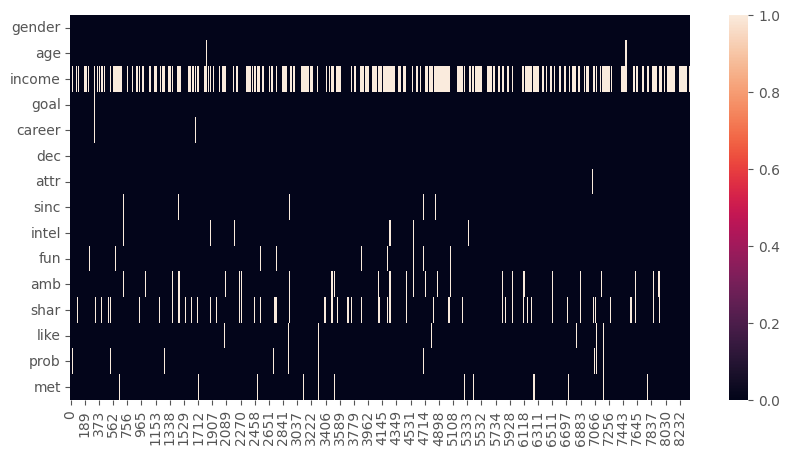

In [335]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.heatmap(dating.isna().transpose());

Закономерностей не наблюдается

Посмотрим, где пропусков меньше и будем запонять снизу вверх

In [336]:
dating.isna().sum().sort_values()

gender       0
dec          0
attr        12
goal        15
age         25
career      25
like        38
sinc        60
intel       73
fun        114
prob       139
met        189
amb        461
shar       850
income    3851
dtype: int64

Личные признаки, с небольшим количеством пропусков, а это goal и age, заполним константой. 

Все остальные признаки, кроме income, заполним через knn

Income запоним медианным внутрегрупповым значением

## Заполнение константой

Посмотрим на распределения

In [337]:
goal_dict = {
    1:'Повеселиться',
    2:'Знакомство с новыми людьми',
    3:'Сходить на свидание',
    4:'Серьезные отношения',
    5:'"Я сделал это"',
    6:'Другое'
}

In [338]:
color = (0.2, 0.7, 0.7, 0.8)
linewidth=0.5
edgecolor="black"

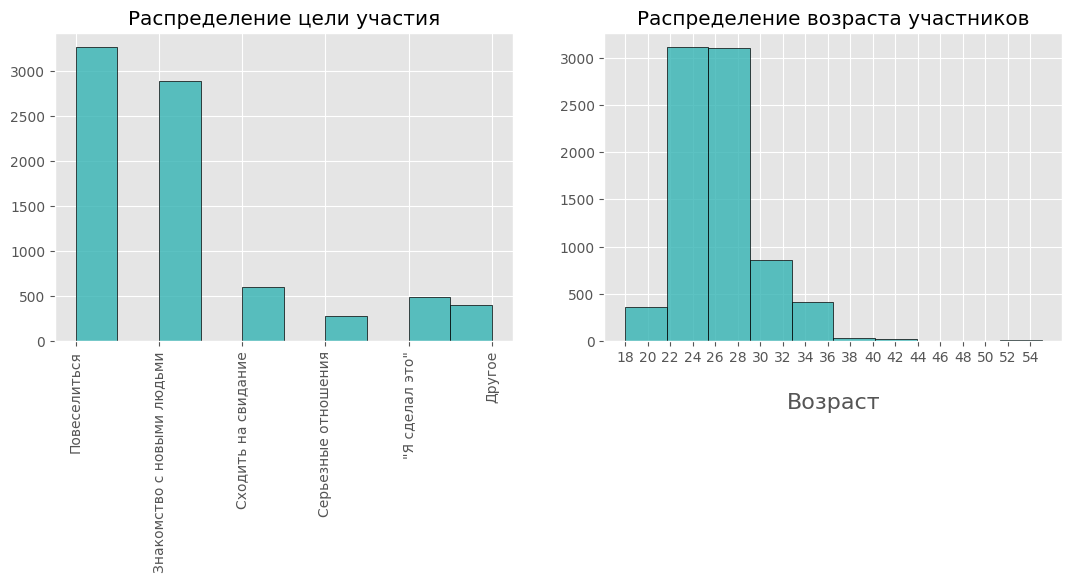

In [339]:
fig, ax = plt.subplots(1,2, figsize=(13,4))



ax[0].hist(dating['goal'], color=color, linewidth=linewidth, edgecolor=edgecolor);
ax[0].set_xticks(range(1, 7), labels=[goal_dict[i] for i in range(1, 7)], rotation=90)
ax[0].set_title('Распределение цели участия')

ax[1].hist(dating['age'], bins=10, color=color, linewidth=linewidth, edgecolor=edgecolor);
ax[1].set_xticks(np.arange(min(dating['age']), max(dating['age'])+1, 2.0));
ax[1].set_title('Распределение возраста участников');
ax[1].set_xlabel('Возраст', fontsize=16, labelpad=20);

В случае goal имеем категориальный признак - заполняем модой. 

В случае с age имеем распределение, похожее на нормальное - заполняем медианой

In [340]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='median')
dating.loc[:,'age'] = imp.fit_transform(dating[['age']])

In [341]:
imp = SimpleImputer(strategy='most_frequent')
dating.loc[:,'goal'] = imp.fit_transform(dating[['goal']])

In [342]:
dating.isna().sum().sort_values()

gender       0
age          0
goal         0
dec          0
attr        12
career      25
like        38
sinc        60
intel       73
fun        114
prob       139
met        189
amb        461
shar       850
income    3851
dtype: int64

## Заполение через KNN

По столбц career имеем категориальный признак. Нужно перевести в числа - воспользуемся OrdinalEncoder.

In [343]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
dating.loc[:,'career']=oe.fit_transform(dating[['career']])
dating

,gender,age,income,goal,career,dec,attr,sinc,intel,fun,amb,shar,like,prob,met
0,0,21.000,69487.000,2.000,11.000,1,6.000,9.000,7.000,7.000,6.000,5.000,7.000,6.000,2.000
1,0,21.000,69487.000,2.000,11.000,1,7.000,8.000,7.000,8.000,5.000,6.000,7.000,5.000,1.000
2,0,21.000,69487.000,2.000,11.000,1,5.000,8.000,9.000,8.000,5.000,7.000,7.000,NaN,1.000
3,0,21.000,69487.000,2.000,11.000,1,7.000,6.000,8.000,7.000,6.000,8.000,7.000,6.000,2.000
4,0,21.000,69487.000,2.000,11.000,1,5.000,6.000,7.000,7.000,6.000,6.000,6.000,6.000,2.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,1,25.000,NaN,1.000,1.000,0,3.000,5.000,5.000,5.000,NaN,NaN,2.000,5.000,2.000
8374,1,25.000,NaN,1.000,1.000,0,4.000,6.000,8.000,4.000,4.000,NaN,4.000,4.000,2.000
8375,1,25.000,NaN,1.000,1.000,0,4.000,7.000,8.000,8.000,8.000,NaN,6.000,5.000,2.000
8376,1,25.000,NaN,1.000,1.000,0,4.000,6.000,5.000,4.000,NaN,5.000,5.000,5.000,2.000


Теперь, перед использованием алгоритма knn, нужно отмасштобировать данные. Воспользуемся StandartScaler

In [344]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

columns=['gender', 'age', 'goal', 'career',
         'dec', 'attr', 'sinc', 'intel', 
         'fun', 'amb', 'shar', 'like',
         'prob', 'met'] 
scaled_df=pd.DataFrame(scaler.fit_transform(dating[columns]), columns = columns)
scaled_df

,gender,age,goal,career,dec,attr,sinc,intel,fun,amb,shar,like,prob,met
0,-0.997,-1.505,-0.083,0.207,1.159,-0.094,1.060,-0.242,0.310,-0.435,-0.238,0.478,0.370,0.211
1,-0.997,-1.505,-0.083,0.207,1.159,0.423,0.478,-0.242,0.828,-0.996,0.239,0.478,-0.110,-4.736
2,-0.997,-1.505,-0.083,0.207,1.159,-0.612,0.478,1.063,0.828,-0.996,0.716,0.478,NaN,-4.736
3,-0.997,-1.505,-0.083,0.207,1.159,0.423,-0.685,0.411,0.310,-0.435,1.192,0.478,0.370,0.211
4,-0.997,-1.505,-0.083,0.207,1.159,-0.612,-0.685,-0.242,0.310,-0.435,0.239,-0.071,0.370,0.211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7915,1.003,-0.379,-0.795,-1.709,-0.863,-1.646,-1.267,-1.547,-0.725,NaN,NaN,-2.267,-0.110,0.211
7916,1.003,-0.379,-0.795,-1.709,-0.863,-1.129,-0.685,0.411,-1.242,-1.557,NaN,-1.169,-0.590,0.211
7917,1.003,-0.379,-0.795,-1.709,-0.863,-1.129,-0.103,0.411,0.828,0.687,NaN,-0.071,-0.110,0.211
7918,1.003,-0.379,-0.795,-1.709,-0.863,-1.129,-0.685,-1.547,-1.242,NaN,-0.238,-0.620,-0.110,0.211


Теперь можно возпользоваться KNNimputer

In [345]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3, weights="uniform")
dating_imput = pd.DataFrame(imputer.fit_transform(scaled_df),columns=columns)
dating_imput

,gender,age,goal,career,dec,attr,sinc,intel,fun,amb,shar,like,prob,met
0,-0.997,-1.505,-0.083,0.207,1.159,-0.094,1.060,-0.242,0.310,-0.435,-0.238,0.478,0.370,0.211
1,-0.997,-1.505,-0.083,0.207,1.159,0.423,0.478,-0.242,0.828,-0.996,0.239,0.478,-0.110,-4.736
2,-0.997,-1.505,-0.083,0.207,1.159,-0.612,0.478,1.063,0.828,-0.996,0.716,0.478,0.210,-4.736
3,-0.997,-1.505,-0.083,0.207,1.159,0.423,-0.685,0.411,0.310,-0.435,1.192,0.478,0.370,0.211
4,-0.997,-1.505,-0.083,0.207,1.159,-0.612,-0.685,-0.242,0.310,-0.435,0.239,-0.071,0.370,0.211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7915,1.003,-0.379,-0.795,-1.709,-0.863,-1.646,-1.267,-1.547,-0.725,-1.183,-0.715,-2.267,-0.110,0.211
7916,1.003,-0.379,-0.795,-1.709,-0.863,-1.129,-0.685,0.411,-1.242,-1.557,-0.715,-1.169,-0.590,0.211
7917,1.003,-0.379,-0.795,-1.709,-0.863,-1.129,-0.103,0.411,0.828,0.687,0.875,-0.071,-0.110,0.211
7918,1.003,-0.379,-0.795,-1.709,-0.863,-1.129,-0.685,-1.547,-1.242,-1.183,-0.238,-0.620,-0.110,0.211


Возвращаем данным масштаб

In [346]:
dating_imput = pd.DataFrame(scaler.inverse_transform(dating_imput), columns=dating_imput.columns)
dating_imput

,gender,age,goal,career,dec,attr,sinc,intel,fun,amb,shar,like,prob,met
0,0.000,21.000,2.000,11.000,1.000,6.000,9.000,7.000,7.000,6.000,5.000,7.000,6.000,2.000
1,0.000,21.000,2.000,11.000,1.000,7.000,8.000,7.000,8.000,5.000,6.000,7.000,5.000,1.000
2,0.000,21.000,2.000,11.000,1.000,5.000,8.000,9.000,8.000,5.000,7.000,7.000,5.667,1.000
3,0.000,21.000,2.000,11.000,1.000,7.000,6.000,8.000,7.000,6.000,8.000,7.000,6.000,2.000
4,0.000,21.000,2.000,11.000,1.000,5.000,6.000,7.000,7.000,6.000,6.000,6.000,6.000,2.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7915,1.000,25.000,1.000,1.000,0.000,3.000,5.000,5.000,5.000,4.667,4.000,2.000,5.000,2.000
7916,1.000,25.000,1.000,1.000,0.000,4.000,6.000,8.000,4.000,4.000,4.000,4.000,4.000,2.000
7917,1.000,25.000,1.000,1.000,0.000,4.000,7.000,8.000,8.000,8.000,7.333,6.000,5.000,2.000
7918,1.000,25.000,1.000,1.000,0.000,4.000,6.000,5.000,4.000,4.667,5.000,5.000,5.000,2.000


После заполнения появились дробные числа, преобразуем их в int

In [347]:
dating_imput.apply(lambda feature: feature.map( lambda value: value if isinstance(value, int) else int(value)))
dating_imput

,gender,age,goal,career,dec,attr,sinc,intel,fun,amb,shar,like,prob,met
0,0.000,21.000,2.000,11.000,1.000,6.000,9.000,7.000,7.000,6.000,5.000,7.000,6.000,2.000
1,0.000,21.000,2.000,11.000,1.000,7.000,8.000,7.000,8.000,5.000,6.000,7.000,5.000,1.000
2,0.000,21.000,2.000,11.000,1.000,5.000,8.000,9.000,8.000,5.000,7.000,7.000,5.667,1.000
3,0.000,21.000,2.000,11.000,1.000,7.000,6.000,8.000,7.000,6.000,8.000,7.000,6.000,2.000
4,0.000,21.000,2.000,11.000,1.000,5.000,6.000,7.000,7.000,6.000,6.000,6.000,6.000,2.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7915,1.000,25.000,1.000,1.000,0.000,3.000,5.000,5.000,5.000,4.667,4.000,2.000,5.000,2.000
7916,1.000,25.000,1.000,1.000,0.000,4.000,6.000,8.000,4.000,4.000,4.000,4.000,4.000,2.000
7917,1.000,25.000,1.000,1.000,0.000,4.000,7.000,8.000,8.000,8.000,7.333,6.000,5.000,2.000
7918,1.000,25.000,1.000,1.000,0.000,4.000,6.000,5.000,4.000,4.667,5.000,5.000,5.000,2.000


Вернем все в переменную dating

In [348]:
dating_imput['income'] = dating['income']
dating = dating_imput

In [349]:
dating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   gender  7920 non-null   float64
 1   age     7920 non-null   float64
 2   goal    7920 non-null   float64
 3   career  7920 non-null   float64
 4   dec     7920 non-null   float64
 5   attr    7920 non-null   float64
 6   sinc    7920 non-null   float64
 7   intel   7920 non-null   float64
 8   fun     7920 non-null   float64
 9   amb     7920 non-null   float64
 10  shar    7920 non-null   float64
 11  like    7920 non-null   float64
 12  prob    7920 non-null   float64
 13  met     7920 non-null   float64
 14  income  3939 non-null   float64
dtypes: float64(15)
memory usage: 928.3 KB


Вернем признаку career строковые категории

In [350]:
dating['career'] = pd.DataFrame(oe.inverse_transform(dating[['career']]))
dating

,gender,age,goal,career,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,income
0,0.000,21.000,2.000,law,1.000,6.000,9.000,7.000,7.000,6.000,5.000,7.000,6.000,2.000,69487.000
1,0.000,21.000,2.000,law,1.000,7.000,8.000,7.000,8.000,5.000,6.000,7.000,5.000,1.000,69487.000
2,0.000,21.000,2.000,law,1.000,5.000,8.000,9.000,8.000,5.000,7.000,7.000,5.667,1.000,69487.000
3,0.000,21.000,2.000,law,1.000,7.000,6.000,8.000,7.000,6.000,8.000,7.000,6.000,2.000,69487.000
4,0.000,21.000,2.000,law,1.000,5.000,6.000,7.000,7.000,6.000,6.000,6.000,6.000,2.000,69487.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7915,1.000,25.000,1.000,abstained,0.000,3.000,5.000,5.000,5.000,4.667,4.000,2.000,5.000,2.000,NaN
7916,1.000,25.000,1.000,abstained,0.000,4.000,6.000,8.000,4.000,4.000,4.000,4.000,4.000,2.000,46272.000
7917,1.000,25.000,1.000,abstained,0.000,4.000,7.000,8.000,8.000,8.000,7.333,6.000,5.000,2.000,46272.000
7918,1.000,25.000,1.000,abstained,0.000,4.000,6.000,5.000,4.000,4.667,5.000,5.000,5.000,2.000,46272.000


In [351]:
dating['career'].value_counts(dropna=False)

career
science          1793
finance           920
education         691
culture           631
law               628
business          586
social work       471
consulting        429
abstained         413
medicine          404
engineering       204
policy            200
development       184
management        110
biotechnology      66
journalism         66
marketing          48
sport              39
IT                 37
Name: count, dtype: int64

## Заполнение внутрегрупповым медианным значением

In [352]:
dating.head()

,gender,age,goal,career,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,income
0,0.000,21.000,2.000,law,1.000,6.000,9.000,7.000,7.000,6.000,5.000,7.000,6.000,2.000,69487.000
1,0.000,21.000,2.000,law,1.000,7.000,8.000,7.000,8.000,5.000,6.000,7.000,5.000,1.000,69487.000
2,0.000,21.000,2.000,law,1.000,5.000,8.000,9.000,8.000,5.000,7.000,7.000,5.667,1.000,69487.000
3,0.000,21.000,2.000,law,1.000,7.000,6.000,8.000,7.000,6.000,8.000,7.000,6.000,2.000,69487.000
4,0.000,21.000,2.000,law,1.000,5.000,6.000,7.000,7.000,6.000,6.000,6.000,6.000,2.000,69487.000


По распределению возраста (см.п.4.1) можно выделить группы:
- до 22
- 23 - 29
- 30 - 36
- 37 +

Создадим признак группы age_group

In [353]:
def get_age_group(age):
    groups = {'-22': range(0,23),
             '23-29': range(23,30),
             '30-36': range(30,37),
             '37+': range(37, 60)}
    for k, v in groups.items():
        if age in v:
            return k

dating['age_group'] = dating['age'].apply(get_age_group)
dating

,gender,age,goal,career,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,income,age_group
0,0.000,21.000,2.000,law,1.000,6.000,9.000,7.000,7.000,6.000,5.000,7.000,6.000,2.000,69487.000,-22
1,0.000,21.000,2.000,law,1.000,7.000,8.000,7.000,8.000,5.000,6.000,7.000,5.000,1.000,69487.000,-22
2,0.000,21.000,2.000,law,1.000,5.000,8.000,9.000,8.000,5.000,7.000,7.000,5.667,1.000,69487.000,-22
3,0.000,21.000,2.000,law,1.000,7.000,6.000,8.000,7.000,6.000,8.000,7.000,6.000,2.000,69487.000,-22
4,0.000,21.000,2.000,law,1.000,5.000,6.000,7.000,7.000,6.000,6.000,6.000,6.000,2.000,69487.000,-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7915,1.000,25.000,1.000,abstained,0.000,3.000,5.000,5.000,5.000,4.667,4.000,2.000,5.000,2.000,NaN,23-29
7916,1.000,25.000,1.000,abstained,0.000,4.000,6.000,8.000,4.000,4.000,4.000,4.000,4.000,2.000,46272.000,23-29
7917,1.000,25.000,1.000,abstained,0.000,4.000,7.000,8.000,8.000,8.000,7.333,6.000,5.000,2.000,46272.000,23-29
7918,1.000,25.000,1.000,abstained,0.000,4.000,6.000,5.000,4.000,4.667,5.000,5.000,5.000,2.000,46272.000,23-29


Заполним пропуски медианным значением зарплаты, сгрупированным по gender, age, career

In [354]:
cols=['gender', 'age_group', 'career']
dating['income'] = (
    dating
    .groupby(cols)['income']
    .transform(lambda x: x.fillna(x.median()))
)
dating

,gender,age,goal,career,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,income,age_group
0,0.000,21.000,2.000,law,1.000,6.000,9.000,7.000,7.000,6.000,5.000,7.000,6.000,2.000,69487.000,-22
1,0.000,21.000,2.000,law,1.000,7.000,8.000,7.000,8.000,5.000,6.000,7.000,5.000,1.000,69487.000,-22
2,0.000,21.000,2.000,law,1.000,5.000,8.000,9.000,8.000,5.000,7.000,7.000,5.667,1.000,69487.000,-22
3,0.000,21.000,2.000,law,1.000,7.000,6.000,8.000,7.000,6.000,8.000,7.000,6.000,2.000,69487.000,-22
4,0.000,21.000,2.000,law,1.000,5.000,6.000,7.000,7.000,6.000,6.000,6.000,6.000,2.000,69487.000,-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7915,1.000,25.000,1.000,abstained,0.000,3.000,5.000,5.000,5.000,4.667,4.000,2.000,5.000,2.000,36223.000,23-29
7916,1.000,25.000,1.000,abstained,0.000,4.000,6.000,8.000,4.000,4.000,4.000,4.000,4.000,2.000,46272.000,23-29
7917,1.000,25.000,1.000,abstained,0.000,4.000,7.000,8.000,8.000,8.000,7.333,6.000,5.000,2.000,46272.000,23-29
7918,1.000,25.000,1.000,abstained,0.000,4.000,6.000,5.000,4.000,4.667,5.000,5.000,5.000,2.000,46272.000,23-29


In [355]:
dating.isna().sum()

gender         0
age            0
goal           0
career         0
dec            0
attr           0
sinc           0
intel          0
fun            0
amb            0
shar           0
like           0
prob           0
met            0
income       151
age_group      0
dtype: int64

Остались незаполненные строки, т.к им не хватило данных. Попробуем ослабить группировку

In [356]:
cols=['age_group', 'career']
dating['income'] = (
    dating
    .groupby(cols)['income']
    .transform(lambda x: x.fillna(x.median()))
)
dating

,gender,age,goal,career,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,income,age_group
0,0.000,21.000,2.000,law,1.000,6.000,9.000,7.000,7.000,6.000,5.000,7.000,6.000,2.000,69487.000,-22
1,0.000,21.000,2.000,law,1.000,7.000,8.000,7.000,8.000,5.000,6.000,7.000,5.000,1.000,69487.000,-22
2,0.000,21.000,2.000,law,1.000,5.000,8.000,9.000,8.000,5.000,7.000,7.000,5.667,1.000,69487.000,-22
3,0.000,21.000,2.000,law,1.000,7.000,6.000,8.000,7.000,6.000,8.000,7.000,6.000,2.000,69487.000,-22
4,0.000,21.000,2.000,law,1.000,5.000,6.000,7.000,7.000,6.000,6.000,6.000,6.000,2.000,69487.000,-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7915,1.000,25.000,1.000,abstained,0.000,3.000,5.000,5.000,5.000,4.667,4.000,2.000,5.000,2.000,36223.000,23-29
7916,1.000,25.000,1.000,abstained,0.000,4.000,6.000,8.000,4.000,4.000,4.000,4.000,4.000,2.000,46272.000,23-29
7917,1.000,25.000,1.000,abstained,0.000,4.000,7.000,8.000,8.000,8.000,7.333,6.000,5.000,2.000,46272.000,23-29
7918,1.000,25.000,1.000,abstained,0.000,4.000,6.000,5.000,4.000,4.667,5.000,5.000,5.000,2.000,46272.000,23-29


In [357]:
dating['income'].isna().sum()

74

Повторим с gender и career

In [358]:
cols=['gender', 'career']
dating['income'] = (
    dating
    .groupby(cols)['income']
    .transform(lambda x: x.fillna(x.median()))
)
dating['income'].isna().sum()

39

Остальные 39 строк просто удалим

In [359]:
dating.dropna(subset=['income'], inplace=True)
dating.isna().sum()

gender       0
age          0
goal         0
career       0
dec          0
attr         0
sinc         0
intel        0
fun          0
amb          0
shar         0
like         0
prob         0
met          0
income       0
age_group    0
dtype: int64

Примерно оценим колько данных потеряно

In [360]:
round(100 - (len(dating) * 100 / len(dating_backup)), 2)

5.93

Примерно 6%, что вполне приемлемо

# Визуализация

In [361]:
dating.head()

,gender,age,goal,career,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,income,age_group
0,0.000,21.000,2.000,law,1.000,6.000,9.000,7.000,7.000,6.000,5.000,7.000,6.000,2.000,69487.000,-22
1,0.000,21.000,2.000,law,1.000,7.000,8.000,7.000,8.000,5.000,6.000,7.000,5.000,1.000,69487.000,-22
2,0.000,21.000,2.000,law,1.000,5.000,8.000,9.000,8.000,5.000,7.000,7.000,5.667,1.000,69487.000,-22
3,0.000,21.000,2.000,law,1.000,7.000,6.000,8.000,7.000,6.000,8.000,7.000,6.000,2.000,69487.000,-22
4,0.000,21.000,2.000,law,1.000,5.000,6.000,7.000,7.000,6.000,6.000,6.000,6.000,2.000,69487.000,-22


Общие параметры для графиков

In [362]:
color = (0.2, 0.7, 0.7, 0.8)
linewidth=0.5
edgecolor="black"

man_color=(0.1, 0.5, 0.9, 0.5)
woman_color=(0.1, 0.9, 0.5, 0.5)


## Кто пришел на исследование?

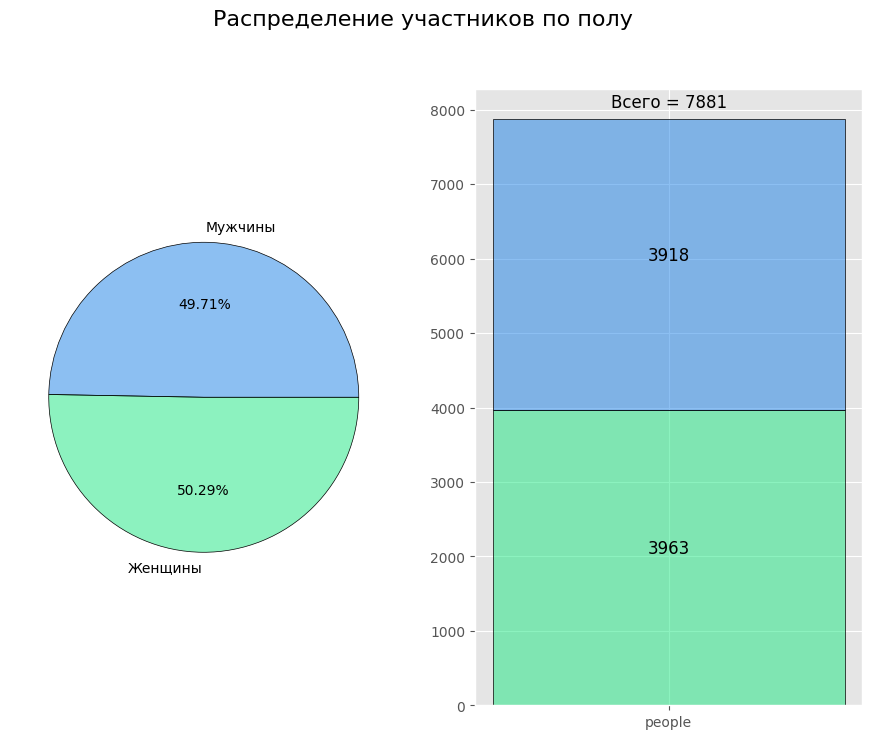

In [363]:
fig, ax = plt.subplots(1,2, figsize=(11,8))
fig.suptitle('Распределение участников по полу', fontsize=16)


female = sum(dating['gender']==0)
male = sum(dating['gender']==1)


ax[0].pie((male, female), labels=('Мужчины', 'Женщины') ,autopct='%0.2f%%', colors=(man_color, woman_color),
          wedgeprops={"edgecolor": edgecolor, 'linewidth': linewidth})

ax[1].bar('people', female, color=woman_color,
         edgecolor= edgecolor, linewidth = linewidth)
ax[1].text(0, female/2, str(female), ha='center', va='bottom', color='black', fontsize=12)

ax[1].bar('people', male, bottom=female, color=man_color,
         edgecolor= edgecolor, linewidth = linewidth)
ax[1].text(0, female + male/2, str(male), ha='center', va='bottom', color='black', fontsize=12)


ax[1].text(0, female + male + 100, 'Всего = ' + str(male + female),
           ha='center', va='bottom', color='black', fontsize=12)

plt.show()

Имеем примерно равное количество мужчин и женщин в эксперименте

In [364]:
# dating['age_gender_count']=dating.groupby(['age', 'gender'])['age'].transform('count')

# def get_f_m_percent(data):
#     age=data['age']
#     gender=data['gender']
#     count=data['age_gender_count']
#     male_count = len(dating[(dating['gender']==1) & (dating['age']==age)])
#     female_count = len(dating[(dating['gender']==0) & (dating['age']==age)])
    
    
#     if gender == 0 and male_count !=0:
#         return round(count / (count + male_count) *100, 1)
#     elif gender == 0 and male_count == 0:
#         return 100
#     elif gender == 1:
#         return round(female_count / (count + male_count) * 100,1)
        
# dating['fem_male_percent'] = dating.apply(get_f_m_percent, axis=1)

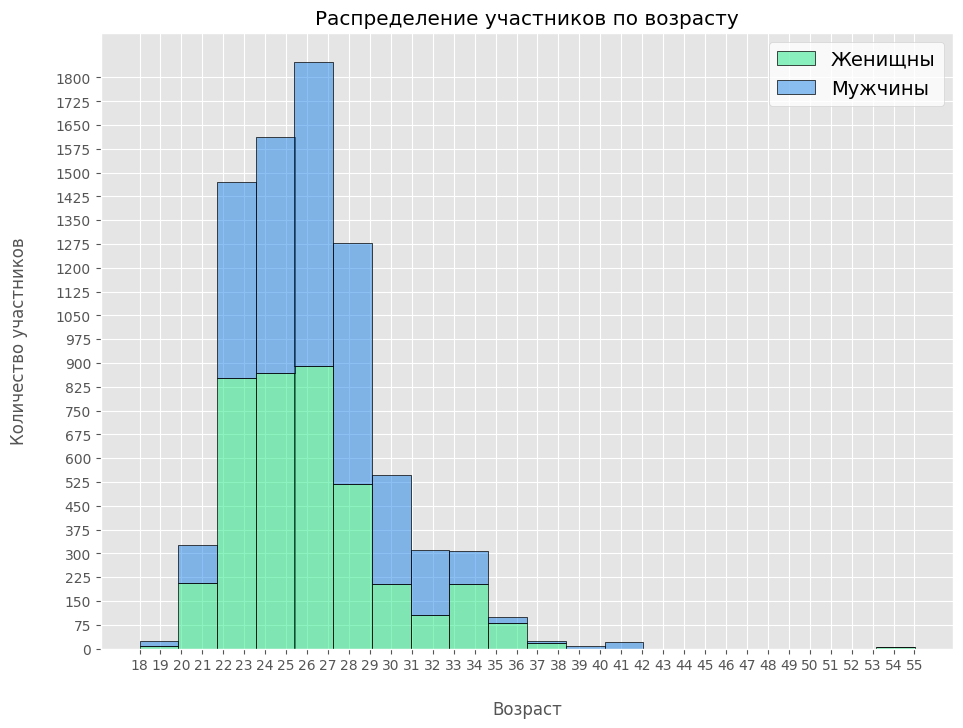

In [365]:
fig,ax=plt.subplots(figsize=(11,8))

male = dating[dating['gender']==1]['age']
female = dating[dating['gender']==0]['age']
labels = ('Женищны', 'Мужчины')

ax.hist([female,male], bins=20, stacked = True ,
        edgecolor= edgecolor, linewidth = linewidth, color = (woman_color, man_color),
       label=labels)

ax.set_title('Распределение участников по возрасту');
ax.set_xticks(np.arange(min(dating['age']), max(dating['age'])+1, 1.0));
ax.set_yticks(np.linspace(0,1800,25));
ax.set_xlabel('Возраст', labelpad=20)
ax.set_ylabel('Количество участников', labelpad=20);

ax.legend(fontsize=14, facecolor=(1,1,1,1));

/tmp/ipykernel_13801/385549457.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dating, x='age', y='age_group', orient='h', ax=ax[1], palette=color_dict);


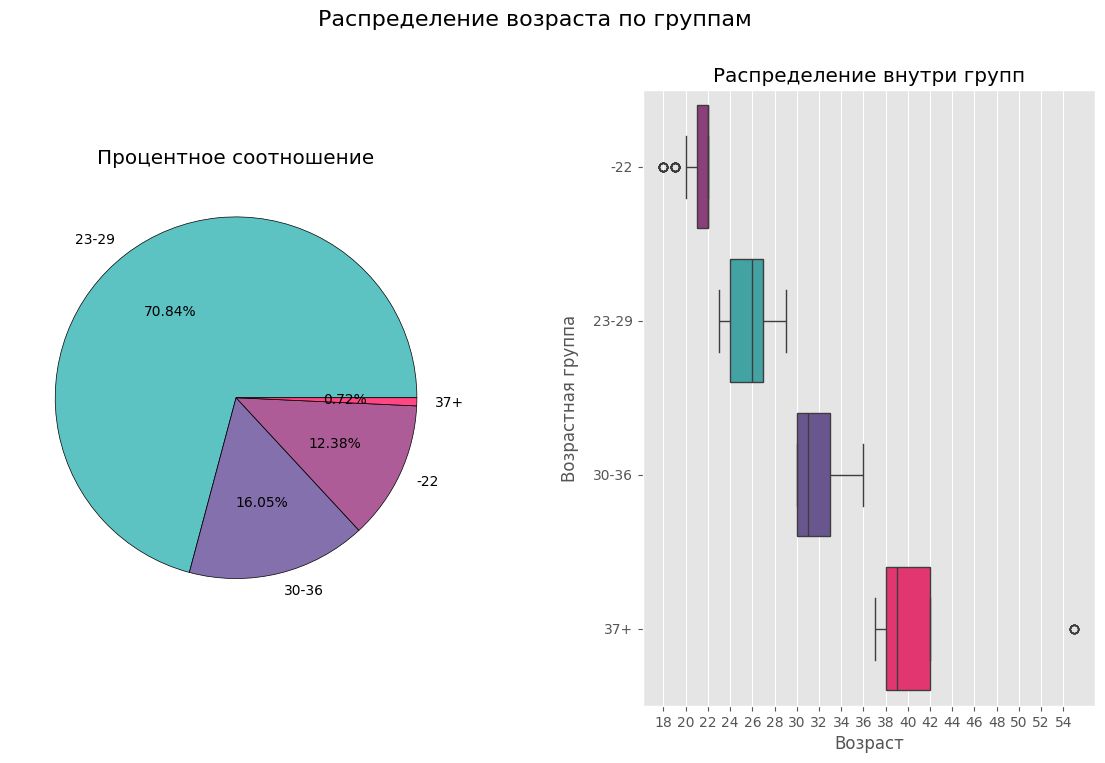

In [366]:
fig, ax = plt.subplots(1, 2, figsize=(14,8))
fig.suptitle('Распределение возраста по группам', fontsize=16)
plt.subplots_adjust(wspace=0.4)

agvc=dating['age_group'].value_counts()
val = agvc.values
labels=agvc.index

def change_rgb(color, r=0, g=0, b=0, s=0):
    return (color[0] + r,
           color[1] + g,
           color[2] + b,
           color[3] + s)

colors = (color,
          change_rgb(color, r=0.2, b=-0.1, g=-0.4),
          change_rgb(color, r=0.4, b=-0.2, g=-0.5),
          change_rgb(color, r=0.8, b=-0.3, g=-0.6))

ax[0].pie(val, labels=labels,autopct='%0.2f%%', colors=colors,
         wedgeprops={"edgecolor": edgecolor, 'linewidth': linewidth});
ax[0].set_title("Процентное соотношение")

color_dict = dict(zip(dating['age_group'].value_counts().index, colors))


sns.boxplot(data=dating, x='age', y='age_group', orient='h', ax=ax[1], palette=color_dict);
ax[1].set_xticks(np.arange(min(dating['age']), max(dating['age'])+1, 2.0));
ax[1].set_xlabel('Возраст');
ax[1].set_ylabel('Возрастная группа', labelpad=10);
ax[1].set_title('Распределение внутри групп');

In [367]:
dating['cnt_age']=dating.groupby(by=['age','gender'])['age'].transform('count')

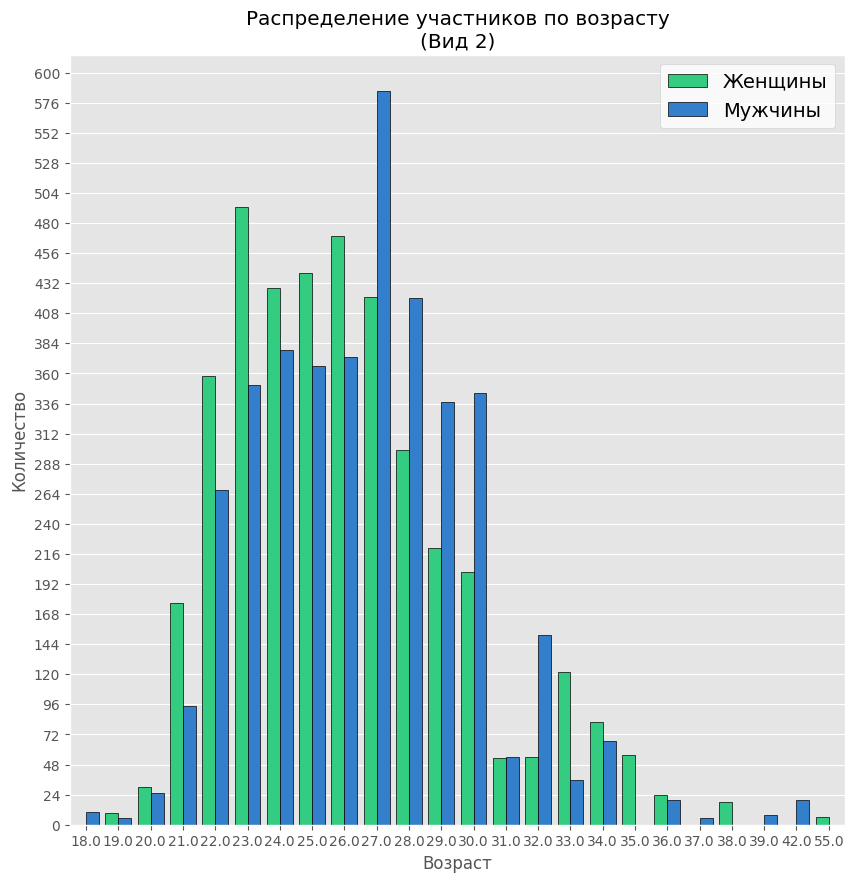

In [368]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
b=sns.barplot(data=dating, x='age', y='cnt_age', hue="gender", palette={0:woman_color, 1:man_color}, ax=ax,
             edgecolor= edgecolor, linewidth = linewidth);

ax.set_yticks(np.linspace(0,600,26));
ax.set_title("Распределение участников по возрасту\n(Вид 2)");
ax.set_xlabel('Возраст')
ax.set_ylabel('Количество');

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Женщины', 'Мужчины'], fontsize=14, facecolor=(1, 1, 1, 1), loc=1)

plt.show()

Выводы:

Активнее всего знакомиться предпочитают в возрасте 23-29. Причем тенденция похожа как у мужчин, так и у женщин.

Отличие в том, что у женщин спад начинается примерно в 25-26, а у мужчин чуть попозже, примерно в 28-29

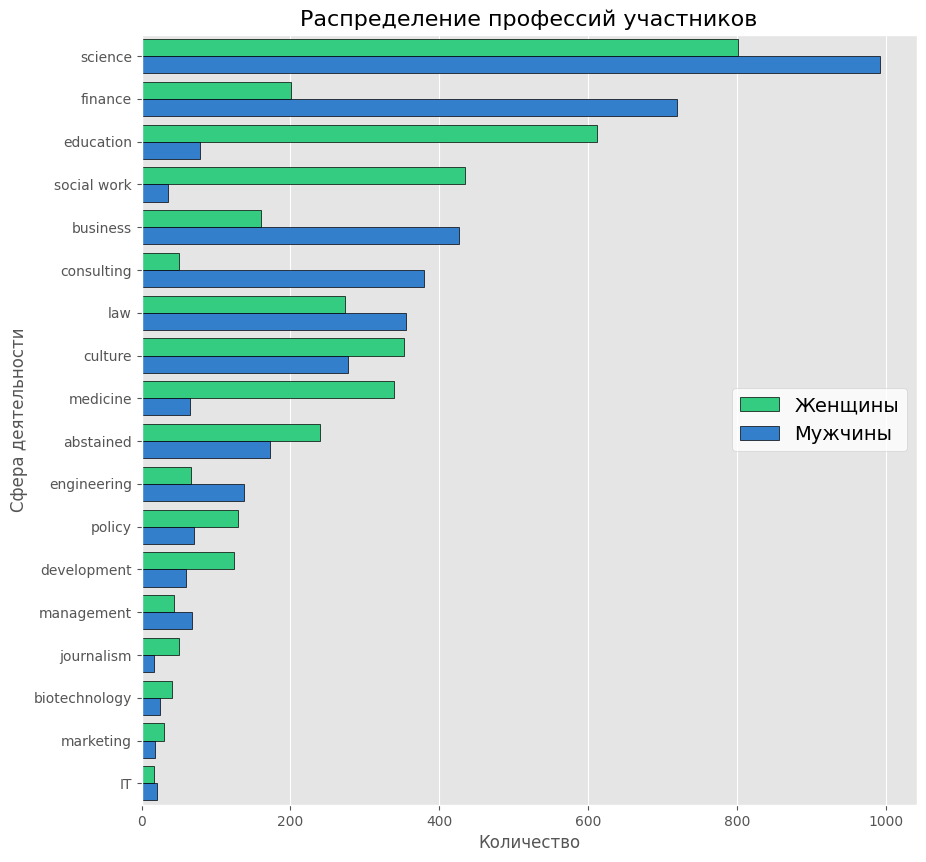

In [369]:
fig, ax = plt.subplots(figsize=(10,10))


dating['cnt_career']=dating.groupby(by=['gender','career'])['career'].transform('count')
sorted_dating = dating.sort_values(by='cnt_career', ascending=False)


sns.barplot(data=sorted_dating, y='career', x='cnt_career', hue="gender", palette={0:woman_color, 1:man_color},
            ax=ax, edgecolor= edgecolor, linewidth = linewidth, orient='h');

ax.set_title('Распределение профессий участников', fontsize=16)
ax.set_xlabel('Количество')
ax.set_ylabel('Сфера деятельности')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Женщины', 'Мужчины'], fontsize=14, facecolor=(1, 1, 1, 1), loc=5);

/tmp/ipykernel_13801/1197476771.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=sorted_dating, x='age', y='career', palette='rainbow', orient='h', ax=ax)


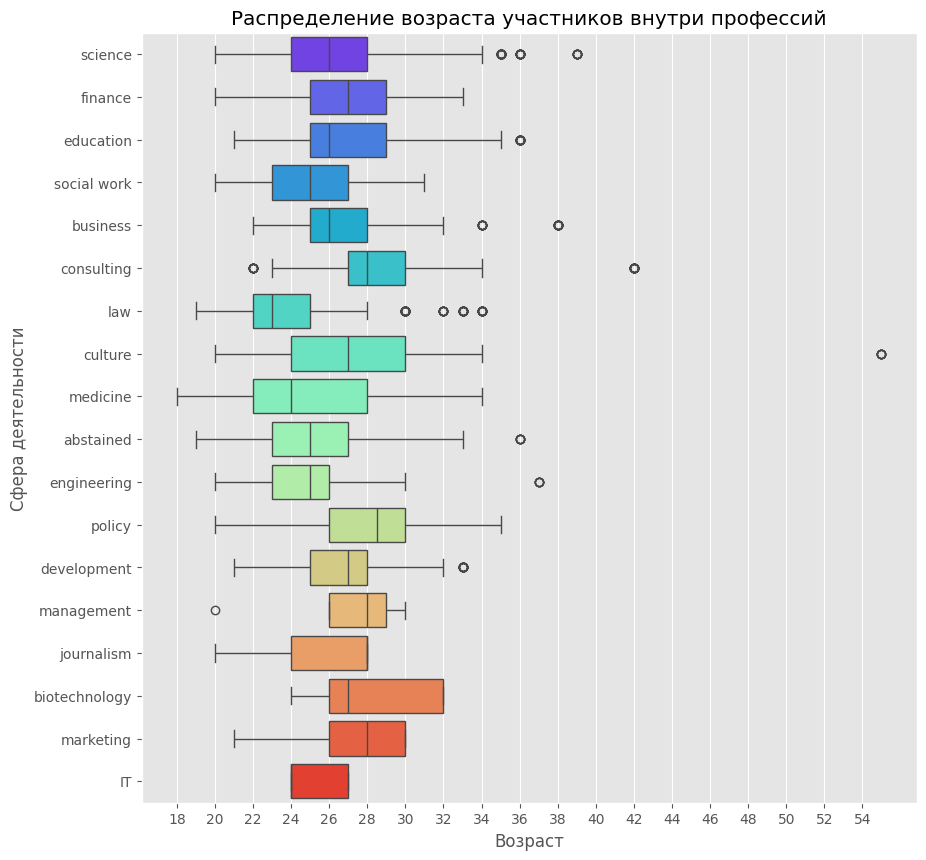

In [370]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
sns.boxplot(data=sorted_dating, x='age', y='career', palette='rainbow', orient='h', ax=ax)

ax.set_title('Распределение возраста участников внутри профессий')
ax.set_xticks(np.arange(min(dating['age']), max(dating['age'])+1, 2.0))
ax.set_xlabel('Возраст')
ax.set_ylabel('Сфера деятельности');

## Зачем пришли?

In [371]:
dating['goal_dict']=dating['goal'].replace(goal_dict)
dating['cnt_goal']=dating.groupby(by=['goal', 'gender'])['goal'].transform('count')

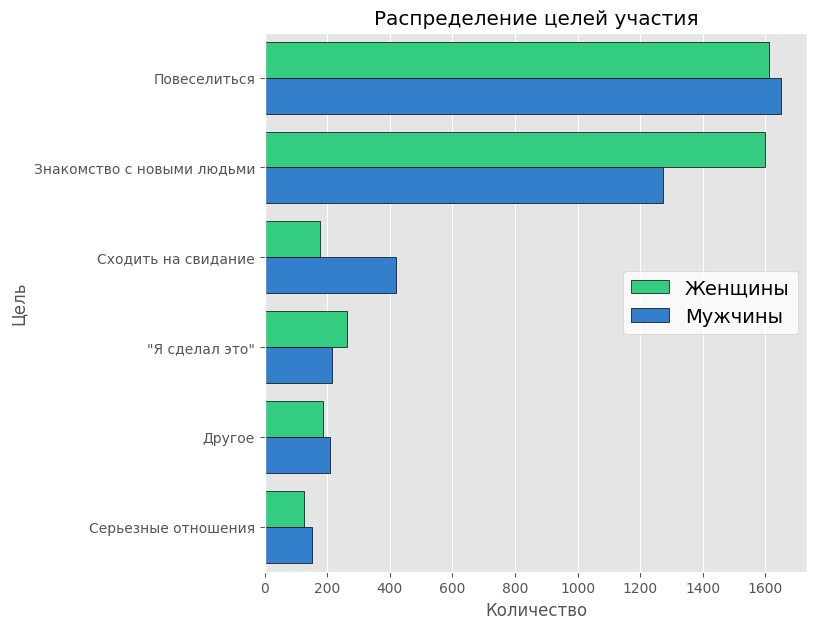

In [372]:
sorted_dating_goal = dating.sort_values(by='cnt_goal', ascending=False)

fig, ax = plt.subplots(1,1, figsize=(7,7))

g = sns.barplot(y="goal_dict", x="cnt_goal", hue="gender", data=sorted_dating_goal,
                palette={0:woman_color, 1:man_color},
                edgecolor= edgecolor, linewidth = linewidth, orient='h', ax=ax)


handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Женщины', 'Мужчины'], fontsize=14, facecolor=(1, 1, 1, 1), loc=5);

ax.set_title('Распределение целей участия')
ax.set_xlabel('Количество')
ax.set_ylabel('Цель');

plt.show()

/tmp/ipykernel_13801/4078416504.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=sorted_dating_goal, x='age', y='goal_dict', palette='rainbow', orient='h', ax=ax)


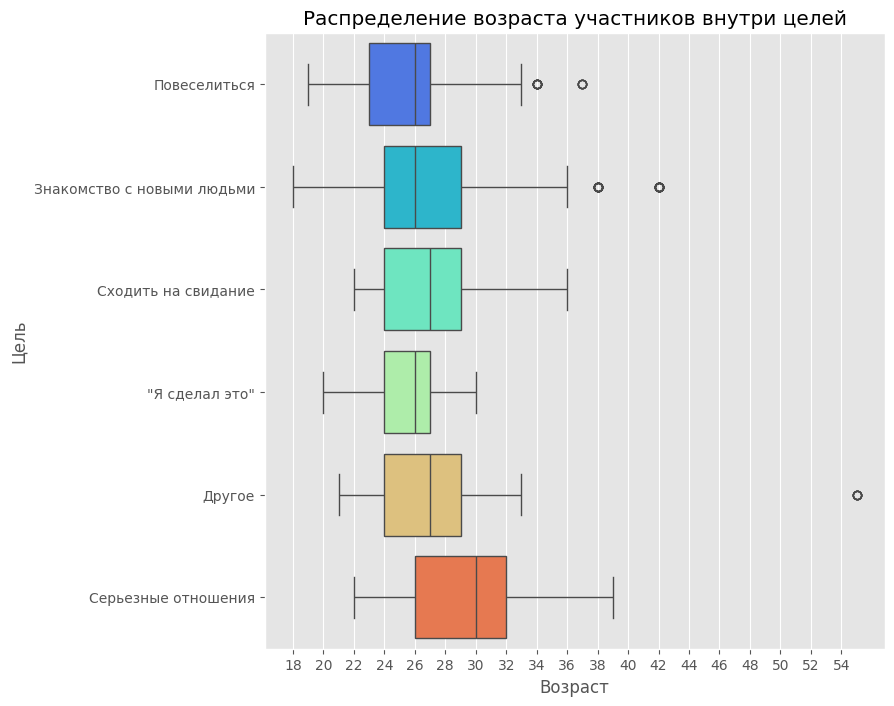

In [373]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
sns.boxplot(data=sorted_dating_goal, x='age', y='goal_dict', palette='rainbow', orient='h', ax=ax)

ax.set_title('Распределение возраста участников внутри целей')
ax.set_xticks(np.arange(min(dating['age']), max(dating['age'])+1, 2.0))
ax.set_xlabel('Возраст')
ax.set_ylabel('Цель');

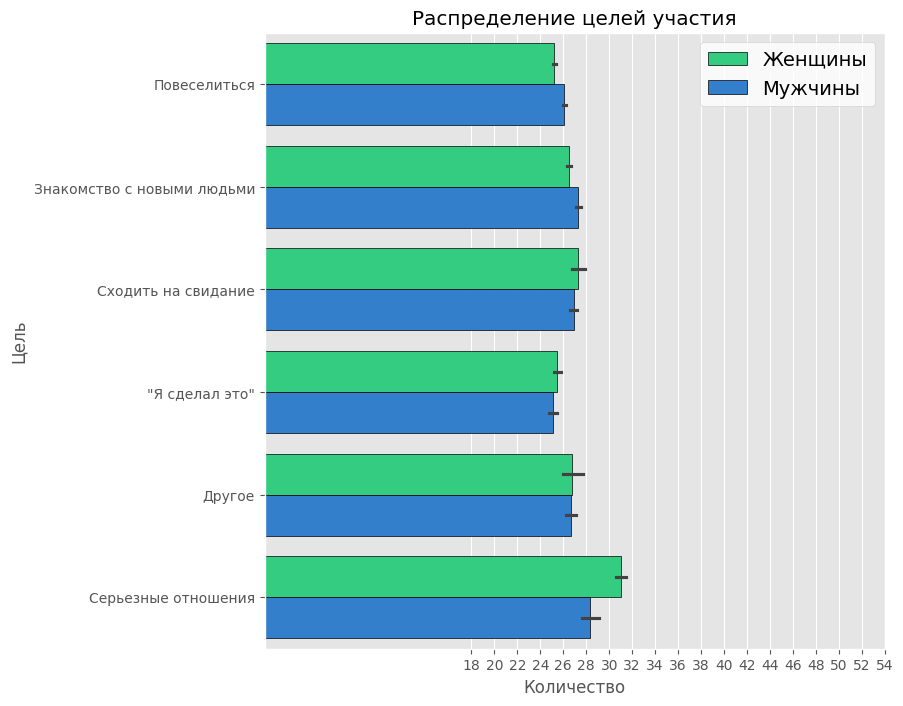

In [374]:
sorted_dating_goal = dating.sort_values(by='cnt_goal', ascending=False)

fig, ax = plt.subplots(1,1, figsize=(8,8))

g = sns.barplot(y="goal_dict", x="age", hue="gender", data=sorted_dating_goal,
                palette={0:woman_color, 1:man_color},
                edgecolor= edgecolor, linewidth = linewidth, orient='h', ax=ax)


handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Женщины', 'Мужчины'], fontsize=14, facecolor=(1, 1, 1, 1), loc=1,
         bbox_to_anchor=(1, 1));

ax.set_xticks(np.arange(min(dating['age']), max(dating['age'])+1, 2.0))
ax.set_title('Распределение целей участия')
ax.set_xlabel('Количество')
ax.set_ylabel('Цель');

plt.show()

Выводы:

В основном на быстрые свидания идут поразвлечься, мало кто всерьез ищет отношения.

Серьезные отношения ищут люди ближе к 30 и более, особенно девушки


## А сколько успешных?

In [375]:
dating['cnt_m']=dating.groupby(by=['dec','gender'])['dec'].transform('count')

/tmp/ipykernel_13801/1218053627.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xticklabels)


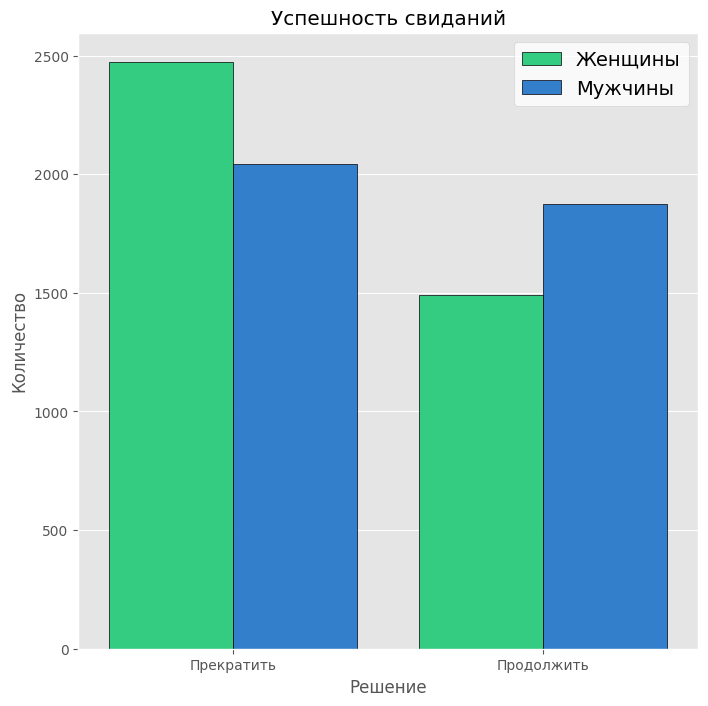

In [376]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))

b=sns.barplot(data=dating, x='dec', y='cnt_m', hue="gender", palette={0:woman_color, 1:man_color}, ax=ax,
             edgecolor= edgecolor, linewidth = linewidth);

ax.set_title("Успешность свиданий");
ax.set_xlabel('Решение')
ax.set_ylabel('Количество');

# Получаем текущие метки оси X
current_xticks = ax.get_xticks()

# Создаем список меток для каждой позиции на оси X
xticklabels = []
for tick in current_xticks:
    if tick == 0:
        xticklabels.append("Прекратить")
    elif tick == 1:
        xticklabels.append("Продолжить")

ax.set_xticklabels(xticklabels)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Женщины', 'Мужчины'], fontsize=14, facecolor=(1, 1, 1, 1), loc=1)

plt.show()

Выводы:

Женщины чаще отказывают и реже согласны продолжать знакомство.

## Влияние на мэтч

In [377]:
columns = dating.columns
columns

Index(['gender', 'age', 'goal', 'career', 'dec', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob', 'met', 'income', 'age_group', 'cnt_age', 'cnt_career', 'goal_dict', 'cnt_goal', 'cnt_m'], dtype='object')

In [378]:
import warnings
warnings.filterwarnings('ignore')

In [379]:
columns = ['age', 'goal_dict', 'career', 'attr',
           'sinc', 'intel', 'fun', 'amb',
           'shar', 'like', 'prob', 'met', 'income',
           ]

x_dict = {
    'age': 'Возраст',
    'goal_dict': 'Цель',
    'career': "Сфера деятельности",
    'attr': "Привлекательность",
    'sinc': "Искренность",
    'intel': "Ум",
    'fun': "Юмор",
    'amb': "Амбициозность",
    'shar': "Совпадение интересов",
    'like': "Общее впечатление",
    'prob': "Взаимность оценки",
    'met': "Встречались раньше",
    'income': 'Доход'
}

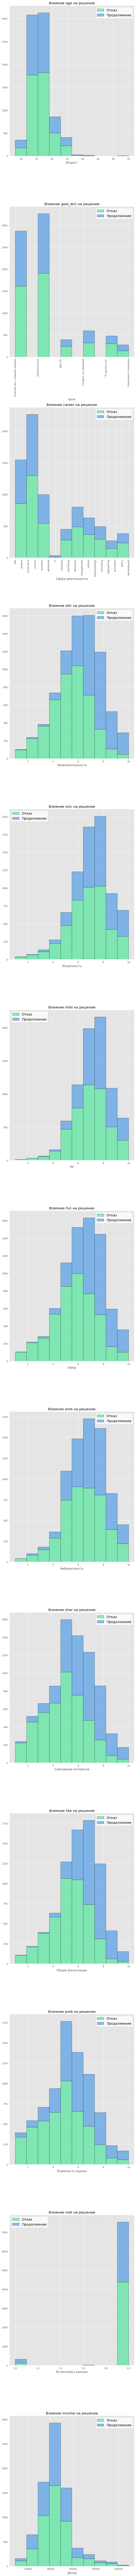

In [380]:
l = len(columns)
n_row = l
n_col = 1


fig, ax = plt.subplots(n_row, n_col, figsize=(8, 150))

for index, name in enumerate(columns): 
    col = index // n_row
    row = index % n_row
    no_match = dating[dating['dec']==0][name]
    match = dating[dating['dec']==1][name]
    
    
    labels = ('Отказ', 'Продолжение')
    ax[row].hist([no_match, match], data=dating, stacked=True,
                edgecolor= edgecolor, linewidth = linewidth,
                 color = (woman_color, man_color), label=labels)
    
   
    ax[row].set_title(f'Влияние {name} на решение')
    ax[row].set_xlabel(x_dict[name])
    ax[row].legend(fontsize=14, facecolor=(1,1,1,1));

    if isinstance(dating[name].loc[0], str):
        ax[row].tick_params(axis='x', rotation=90)
    
plt.tight_layout()


Визуально можно сказать, что:

- Возраст и цель участия почти не влияют на решение
- Чуть больше влияет сфера деятельности, есть такие, где заметно больше отказов\мэтчей
- Интересно, что во всех качествах от привлекательности до дохода одна тенденция - самые привлекательные чуть выше среднего. Примерно на 7-8 больше всего мэтчей. Ниже 5 и выше 8 процент отказов больше, чем продолжений
- если люди уже были знакомы, то вероятность продолжения растет. Но таких данных значительно меньше. 

In [387]:
cols=['age', 'goal', 'dec', 'attr', 'sinc', 'intel',
      'fun', 'amb', 'shar', 'like', 'prob', 'met', 'income']

female_dec=dating[dating['gender']==0][cols].corr().round(1)
male_dec=dating[dating['gender']==1][cols].corr().round(1)


Корреляция признаков у мужчин

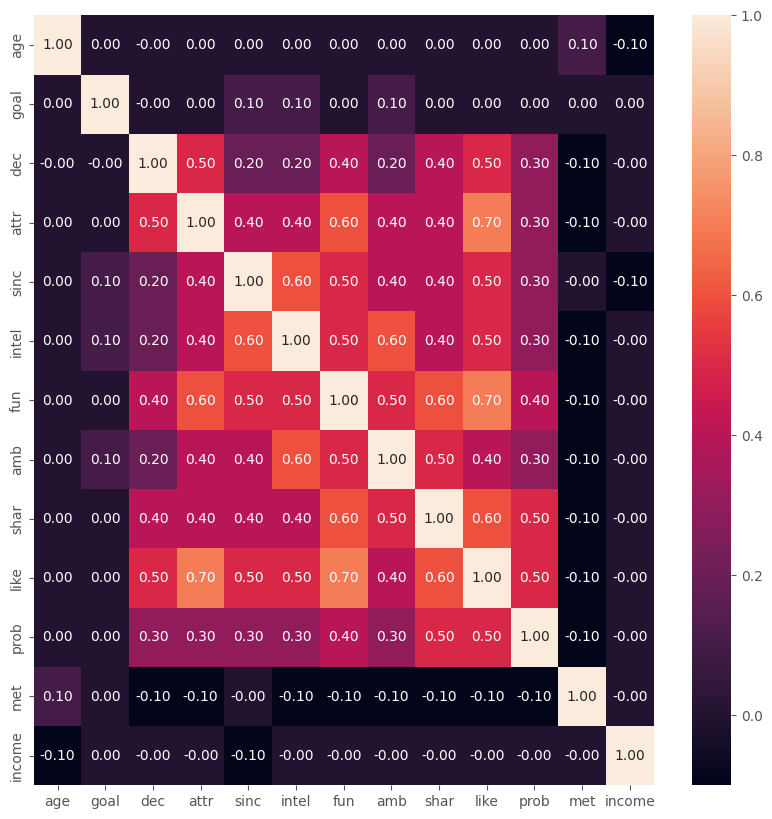

In [388]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
sns.heatmap(male_dec, annot=True, fmt=".2f");

Корреляция признаков для женщин

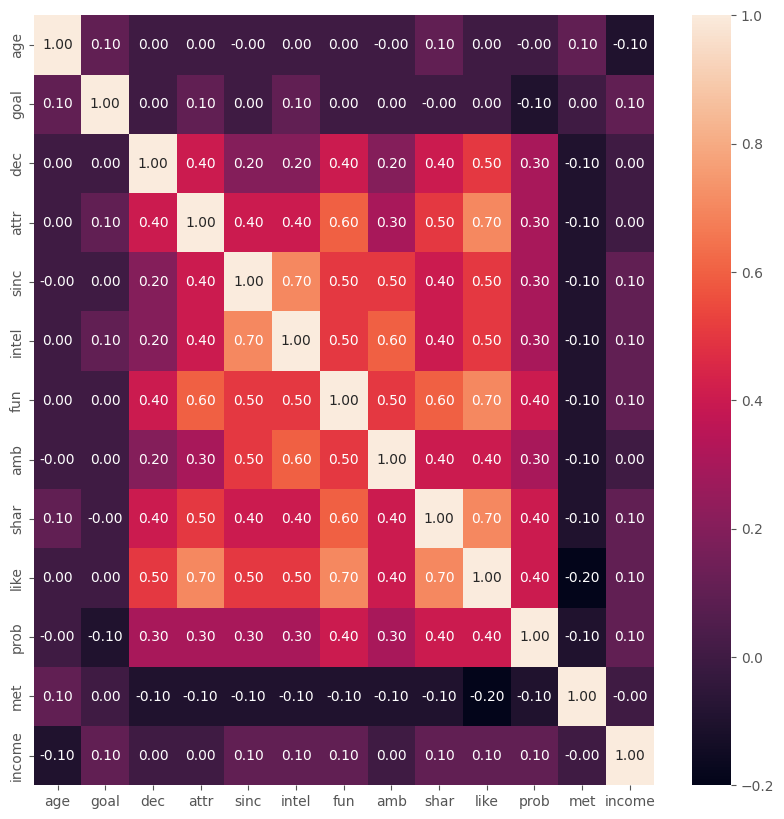

In [389]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
sns.heatmap(female_dec, annot=True, fmt=".2f");

In [390]:
female_dec['dec'].sort_values(ascending=False)

dec       1.000
like      0.500
attr      0.400
fun       0.400
shar      0.400
prob      0.300
sinc      0.200
intel     0.200
amb       0.200
age       0.000
goal      0.000
income    0.000
met      -0.100
Name: dec, dtype: float64

Для женщин важнее всего общее впечатление, 

на 2 месте привлекательность, совпадение интереснов и юмор

на 3 важно, чтобы их оценили также!

Корреляция признаков для мужчин

In [392]:
male_dec['dec'].sort_values(ascending=False)

dec       1.000
attr      0.500
like      0.500
fun       0.400
shar      0.400
prob      0.300
sinc      0.200
intel     0.200
amb       0.200
age      -0.000
goal     -0.000
income   -0.000
met      -0.100
Name: dec, dtype: float64

Для мужчин важнее всего общее впечатление и привлекательность, 

на 2 месте совпадение интереснов и юмор

на 3 важно, чтобы их оценили также!

Выводы:

Решают привлекательность, юмор и общие интересы

Также важно, чтобы партнер оценивал схожим образом

Большой разницы между мужчинами и женщинами нет

## Самая мэтч профессия

In [394]:
dating['career_match_procent']=dating.groupby('career')['dec'].transform(lambda x: sum(x)/len(x)*100)
sort_dating_career = dating.sort_values(by=['career_match_procent'], ascending=False)

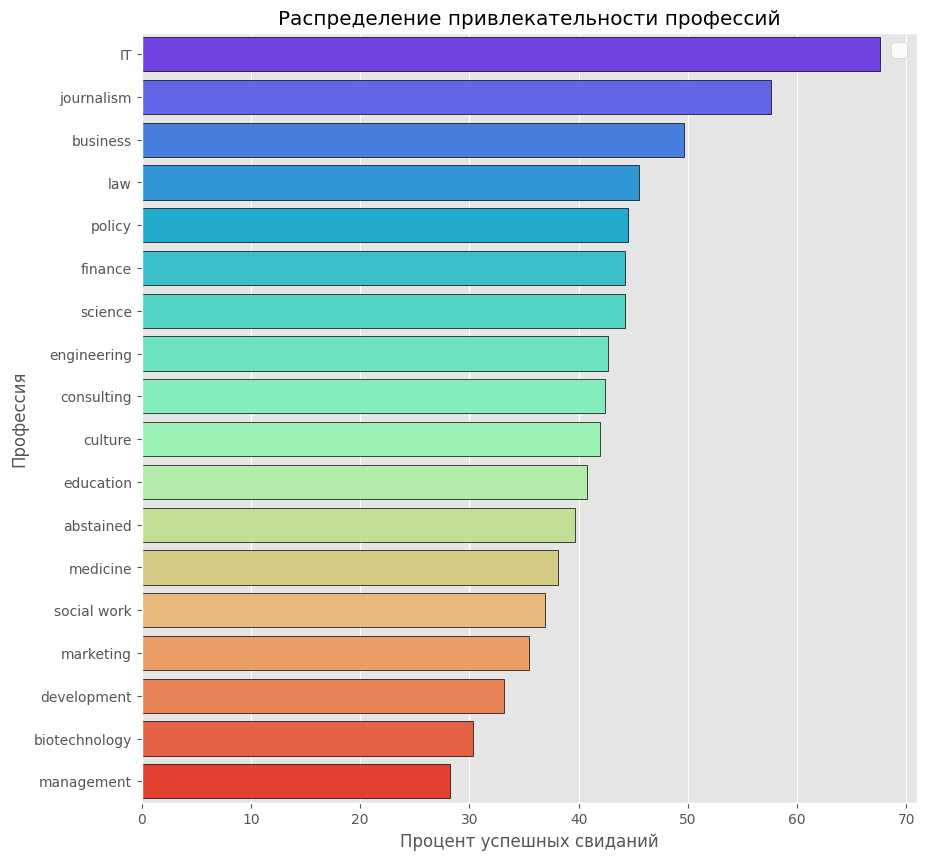

In [395]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
b=sns.barplot(data=sort_dating_career, y='career', x='career_match_procent', ax=ax,
             edgecolor= edgecolor, linewidth = linewidth, orient='h', palette='rainbow');

ax.set_title("Распределение привлекательности профессий");
ax.set_xlabel('Процент успешных свиданий')
ax.set_ylabel('Профессия');

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Женщины', 'Мужчины'], fontsize=14, facecolor=(1, 1, 1, 1), loc=1)

plt.show()

Выводы:

самые привлекательные для знакомств профессии

- IT
- журналист
- бизнесмен

Наименее привлекательные:

- Менеджер
- Биотехнологии
- Development


# Выводы

1. Определить наиболее важные для мэтча качества для мужчин и женщин.

Решают привлекательность, юмор и общие интересы

Также важно, чтобы партнер оценивал схожим образом

Большой разницы между мужчинами и женщинами нет

2. Определить самые привлекательные профессии

самые привлекательные для знакомств профессии

- IT
- журналист
- бизнесмен

Наименее привлекательные:

- Менеджер
- Биотехнологии
- Development


3. Предсказать будет ли совпадение у людей, по их качествам

В разработке

4. Девушки отказывают чаще?

Да, гипотеза подтверждена. Девушки чаще отказывают и реже соглашаются

5. Если уже встречали друг друга, то шанс на успех понижается?

Нет, наоборот, если люди уже знакомы, то шанс на успех выше. Но данных маловато

6. Серьезность намерений растет с возрастом?

Да, как минимум по имеющимся данным (мало участников 40+) серьезность намерений растет с возрастом. 

7. Добиваются ли люди своей цели, и с какой целью лучше идти на свидание?

Цель не слишком влияет на решение. Как развлечение, так и попытка найти серьезные отношения имеют визуально одинаковый процент успеха